# Machine Learning Project

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from  google.colab import files
import plotly.express as px

# Data Processing
from sklearn.impute import SimpleImputer
from scipy import stats



In [ ]:
files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


{'heart_failure_clinical_records_dataset.csv': b'age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT\n75,0,582,0,20,1,265000,1.9,130,1,0,4,1\n55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1\n65,0,146,0,20,0,162000,1.3,129,1,1,7,1\n50,1,111,0,20,0,210000,1.9,137,1,0,7,1\n65,1,160,1,20,0,327000,2.7,116,0,0,8,1\n90,1,47,0,40,1,204000,2.1,132,1,1,8,1\n75,1,246,0,15,0,127000,1.2,137,1,0,10,1\n60,1,315,1,60,0,454000,1.1,131,1,1,10,1\n65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1\n80,1,123,0,35,1,388000,9.4,133,1,1,10,1\n75,1,81,0,38,1,368000,4,131,1,1,10,1\n62,0,231,0,25,1,253000,0.9,140,1,1,10,1\n45,1,981,0,30,0,136000,1.1,137,1,0,11,1\n50,1,168,0,38,1,276000,1.1,137,1,0,11,1\n49,1,80,0,30,1,427000,1,138,0,0,12,0\n82,1,379,0,50,0,47000,1.3,136,1,0,13,1\n87,1,149,0,38,0,262000,0.9,140,1,0,14,1\n45,0,582,0,14,0,166000,0.8,127,1,0,14,1\n70,1,125,0,25,1,237000,1,140,0,0,15,1\n48,1,582,1,55,0,87000,1.9,1

# Reading and checking data

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')#Data Frame
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
df.corr()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
makers = df['age'].value_counts().index


In [ ]:
model_count = df['age'].value_counts().values



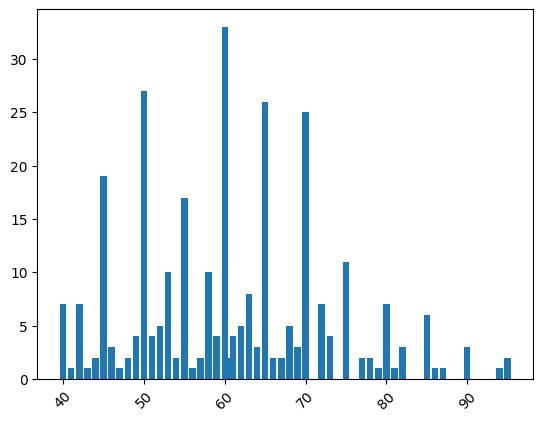

In [ ]:
plt.bar(makers, model_count)
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.isna().values.any()

False

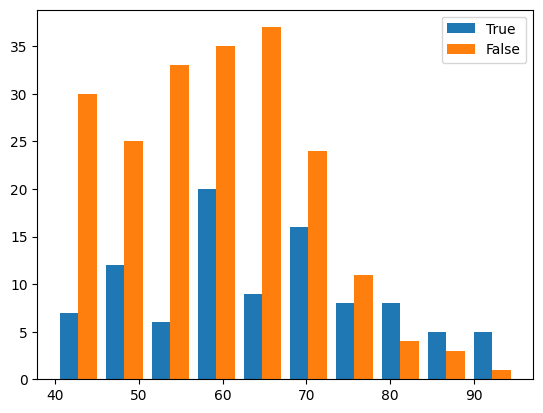

In [ ]:
death_events = df.DEATH_EVENT.unique()
plt.hist([df.loc [df.DEATH_EVENT == e, 'age'] for e in death_events])
plt.legend(death_events.astype('bool'))


# Classification

In [ ]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

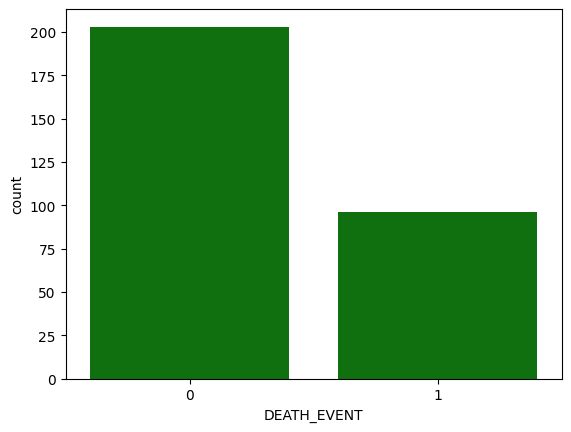

In [ ]:
sns.countplot(data=df, x="DEATH_EVENT", color='green')


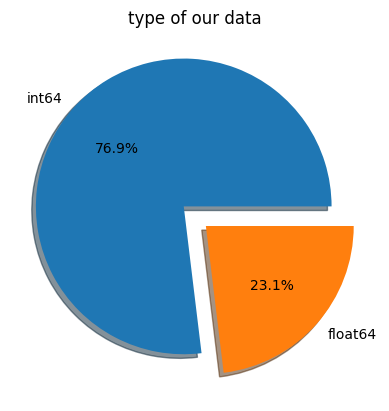

In [ ]:
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of our data');


# Visulazation

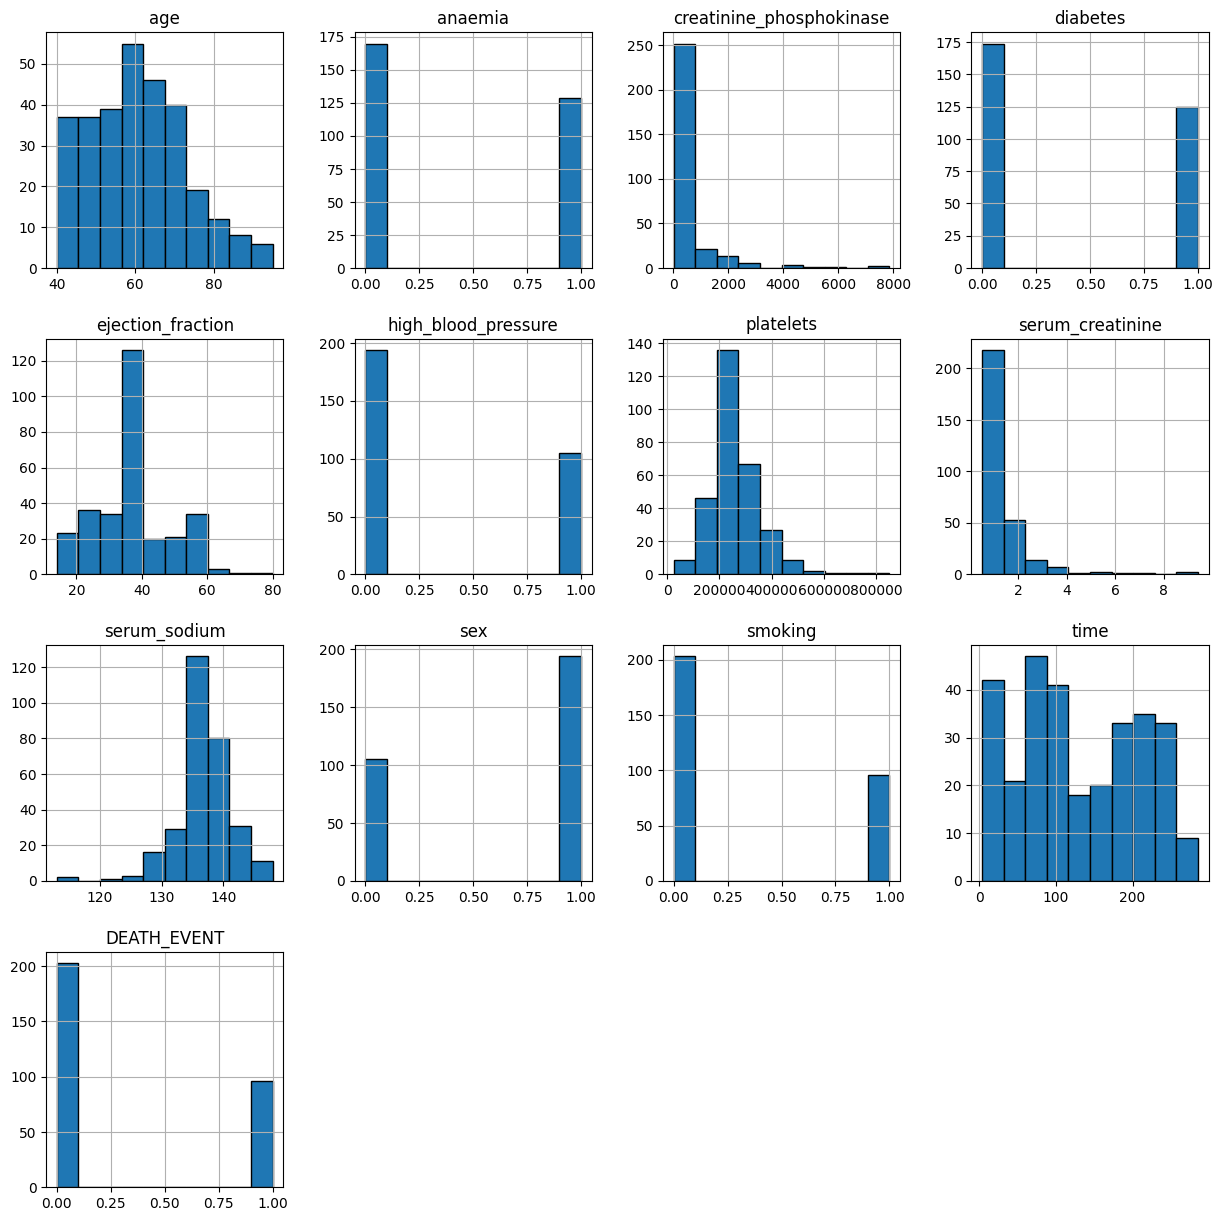

In [ ]:

df.hist(figsize=(15,15),edgecolor='black');

Text(0.5, 1.0, 'the % of deaths')

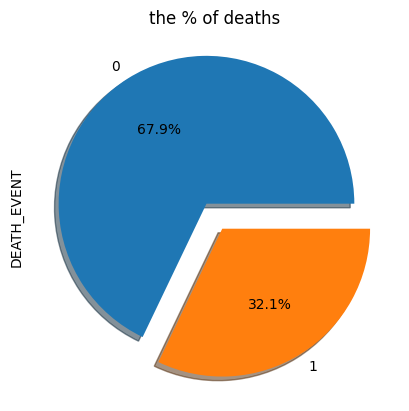

In [ ]:
df.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('the % of deaths')

# Classification Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
method_names=[]
method_scores=[]
lr = LogisticRegression()
param_grid = {
    "C": [1,2,3,3,4,5,6,7,8,9,10],
    "penalty": ["l1", "l2", "elasticnet"]
}

method_names.append("Logistic Regression")
gscv = GridSearchCV(lr, param_grid, cv=5, scoring="accuracy")
gscv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print("Best params: ", gscv.best_params_)
print("Best Score: ", gscv.best_score_)

Best params:  {'C': 1, 'penalty': 'l2'}
Best Score:  0.8322695035460992


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix


Score:  0.8


<Axes: >

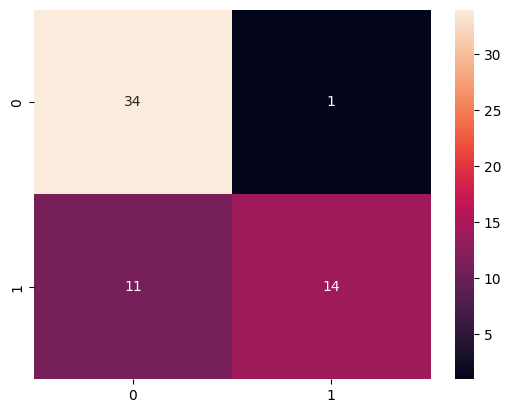

In [ ]:
y_pred = gscv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score: ", score)
method_scores.append(score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,25,27,29, 31]
}

method_names.append("KNN")
gscv = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 22, 23,
                                         25, 27, 29, 31]},
             scoring='accuracy')

In [ ]:
print("Best params: ", gscv.best_params_)
print("Best Score: ", gscv.best_score_)


Best params:  {'n_neighbors': 7}
Best Score:  0.7656028368794326


Score:  0.6833333333333333


<Axes: >

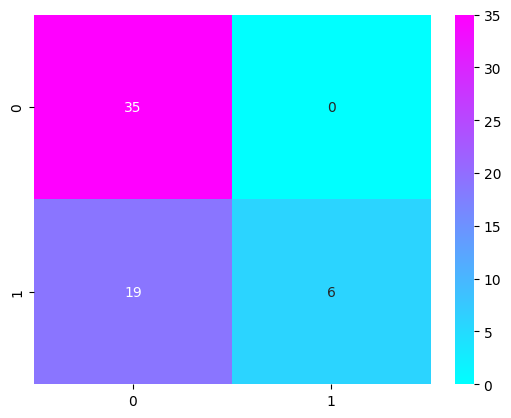

In [ ]:
y_pred = gscv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score: ", score)
method_scores.append(score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="cool")

SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()

param_grid = {
    "C": [0.1, 0.01, 1, 0.001, 1],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": [0.1, 0.01, 0.001, 1, 10]
}

method_names.append("SVM")
gscv = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1, 0.001, 1],
                         'gamma': [0.1, 0.01, 0.001, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
print("Best params: ", gscv.best_params_)
print("Best Score: ", gscv.best_score_)


Best params:  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score:  0.8241134751773049


Score:  0.8


<Axes: >

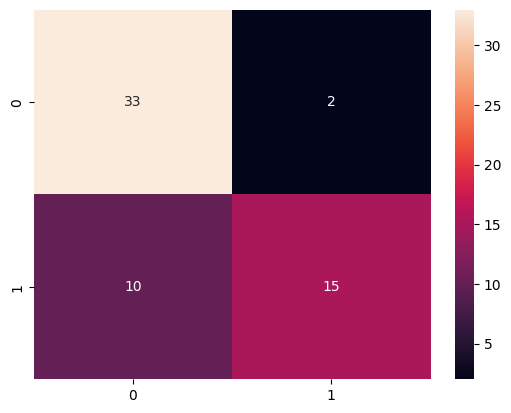

In [ ]:
y_pred = gscv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score: ", score)
method_scores.append(score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
}

method_names.append("Random Forest")
gscv = GridSearchCV(rf, param_grid, cv = 5, scoring="accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550]},
             scoring='accuracy')

In [ ]:
print("Best Params: ", gscv.best_params_)
print("Best score: ", gscv.best_score_)


Best Params:  {'n_estimators': 100}
Best score:  0.899645390070922


Score:  0.7166666666666667


<Axes: >

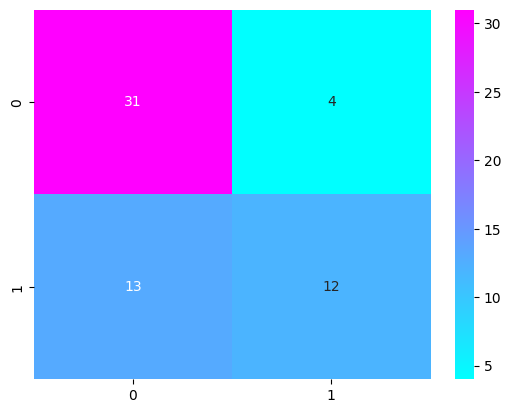

In [ ]:
y_pred = gscv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score: ", score)
method_scores.append(score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d",cmap="cool")

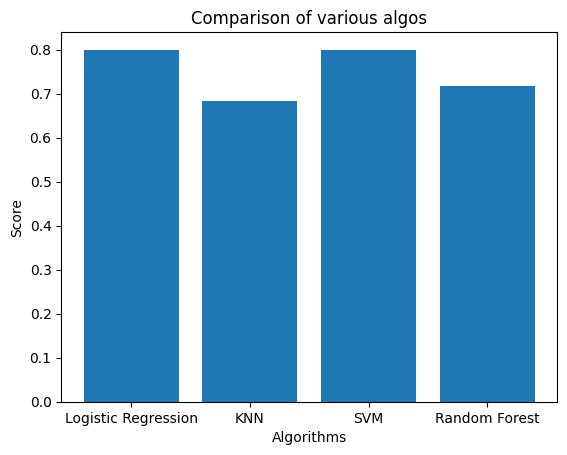

In [ ]:
plt.bar(method_names, method_scores)
plt.title("Comparison of various algos")
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.show()

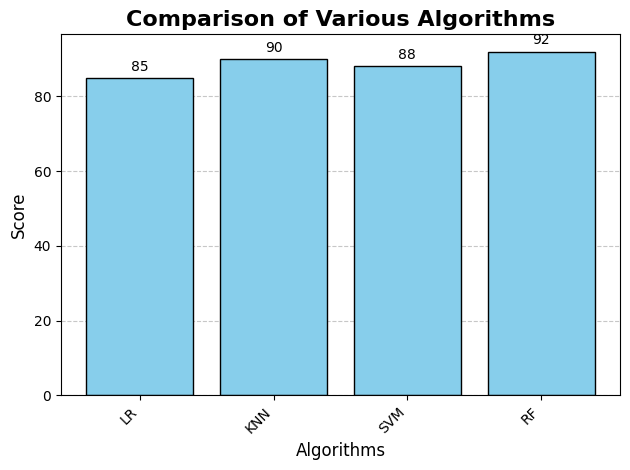

In [ ]:
import matplotlib.pyplot as plt

# Data
method_names = ["LR", "KNN", "SVM", "RF"]
method_scores = [85, 90, 88, 92]

# Plot
fig, ax = plt.subplots()
bars = ax.bar(method_names, method_scores, color='skyblue', edgecolor='black')

# Title and labels
ax.set_title("Comparison of Various Algorithms", fontsize=16, fontweight='bold')
ax.set_xlabel("Algorithms", fontsize=12)
ax.set_ylabel("Score", fontsize=12)

# Styling
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Ensure grid is behind bars
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


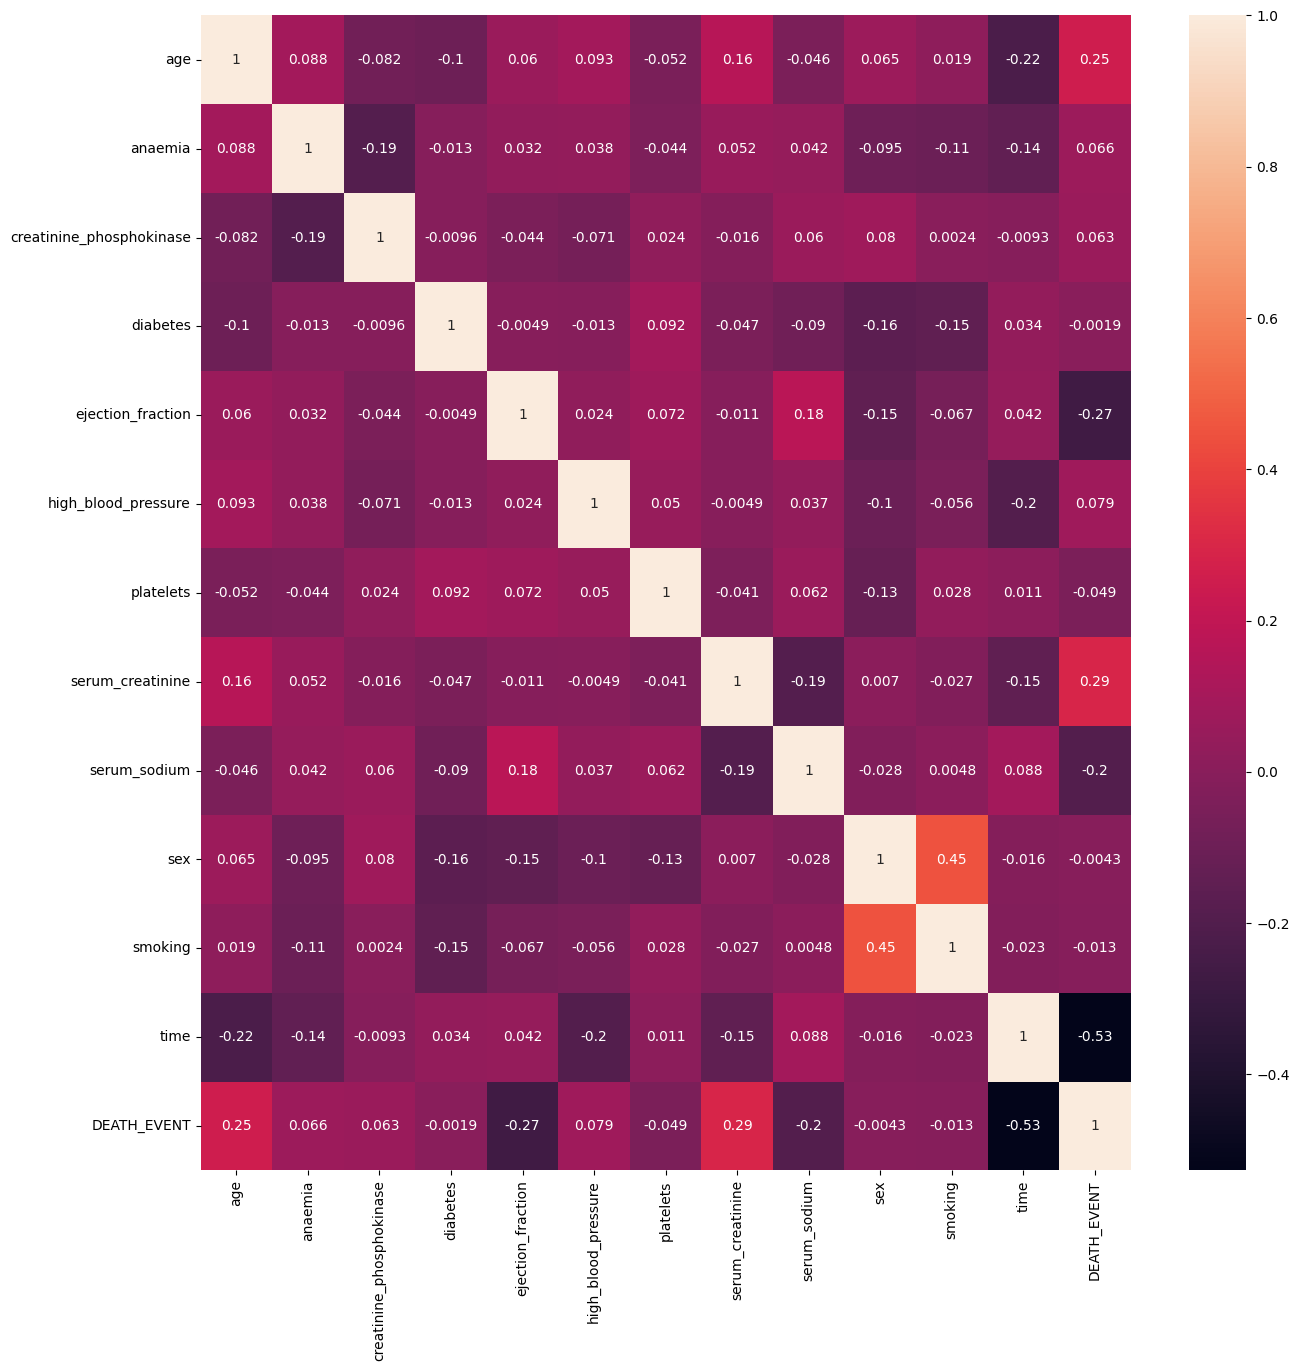

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True);

Decision Tree Score:  0.7333333333333333


<Axes: >

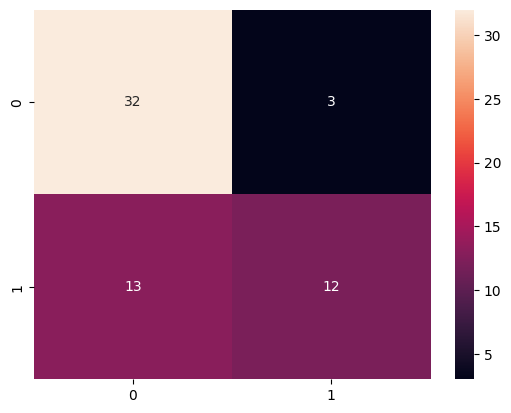

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier using GridSearchCV (gscv is assumed to be already defined)
gscv.fit(X_train, y_train)

# Predict on test set
y_pred_dt = gscv.predict(X_test)

# Calculate accuracy score
score_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Score: ", score_dt)

# Append score to method_scores if needed
method_scores.append(score_dt)

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
sns.heatmap(cm_dt, annot=True, fmt="d")


Naive Bayes Score:  0.7166666666666667


<Axes: >

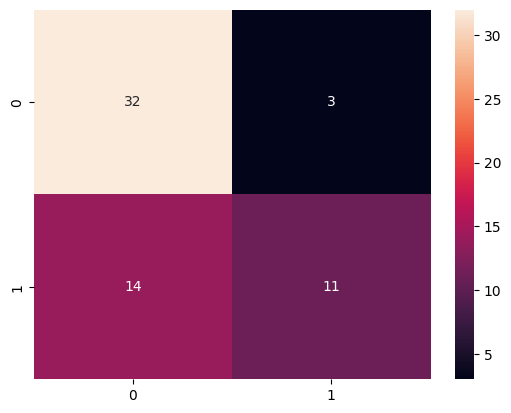

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes Classifier
nb_classifier = GaussianNB()

# Train the classifier using GridSearchCV (gscv is assumed to be already defined)
gscv.fit(X_train, y_train)

# Predict on test set
y_pred_nb = gscv.predict(X_test)

# Calculate accuracy score
score_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Score: ", score_nb)

# Append score to method_scores if needed
method_scores.append(score_nb)

# Generate confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
sns.heatmap(cm_nb, annot=True, fmt="d")


QDA Score:  0.7333333333333333


<Axes: >

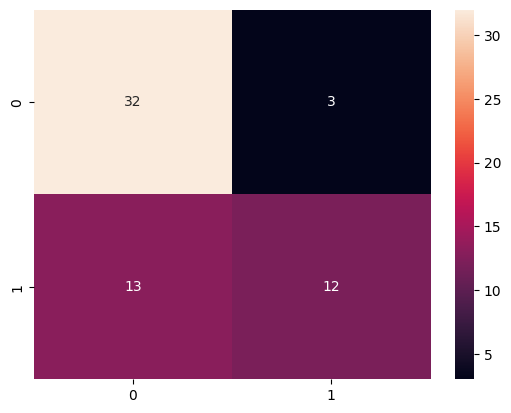

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize QDA Classifier
qda_classifier = QuadraticDiscriminantAnalysis()

# Train the classifier using GridSearchCV (gscv is assumed to be already defined)
gscv.fit(X_train, y_train)

# Predict on test set
y_pred_qda = gscv.predict(X_test)

# Calculate accuracy score
score_qda = accuracy_score(y_test, y_pred_qda)
print("QDA Score: ", score_qda)

# Append score to method_scores if needed
method_scores.append(score_qda)

# Generate confusion matrix
cm_qda = confusion_matrix(y_test, y_pred_qda)

# Plot confusion matrix
sns.heatmap(cm_qda, annot=True, fmt="d")


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Split the data into features and target variable
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print('Random Forest Accuracy:', rf_accuracy)

print(classification_report(y_test, rf_predictions))

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print('Logistic Regression Accuracy:', lr_accuracy)
print(classification_report(y_test, lr_predictions))

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Support Vector Machine with SMOTE
svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print('SVM with SMOTE Accuracy:', svm_accuracy)
print(classification_report(y_test, svm_predictions))


Random Forest Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

    accuracy                           0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60

Logistic Regression Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

SVM with SMOTE Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.59      0.91      0.72        35
           1       0.50      0.12      0.19        25

    accuracy                           0.58        60
   macr

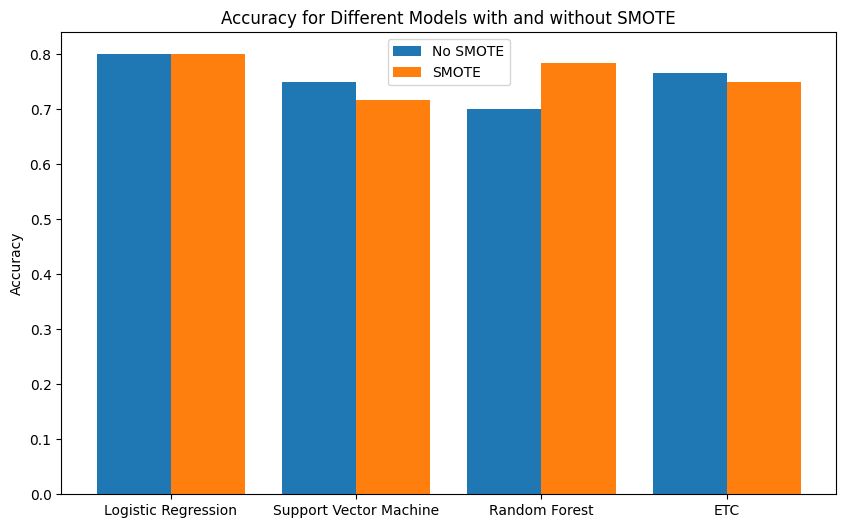

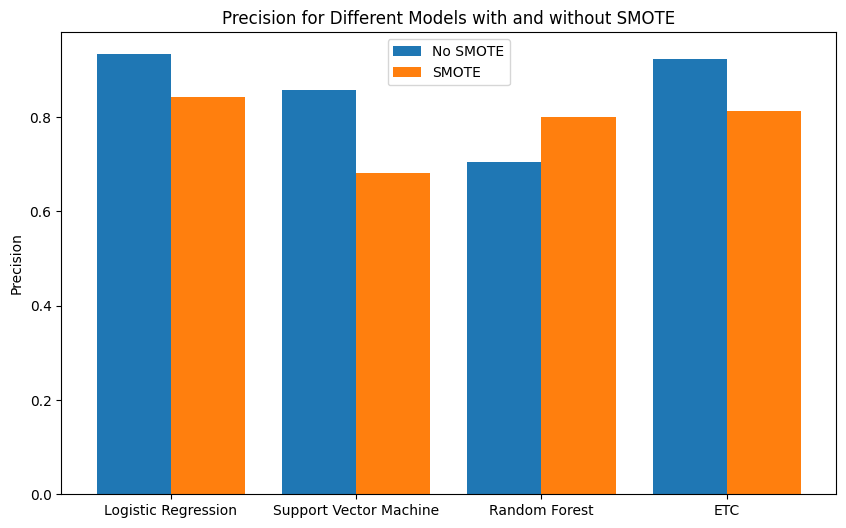

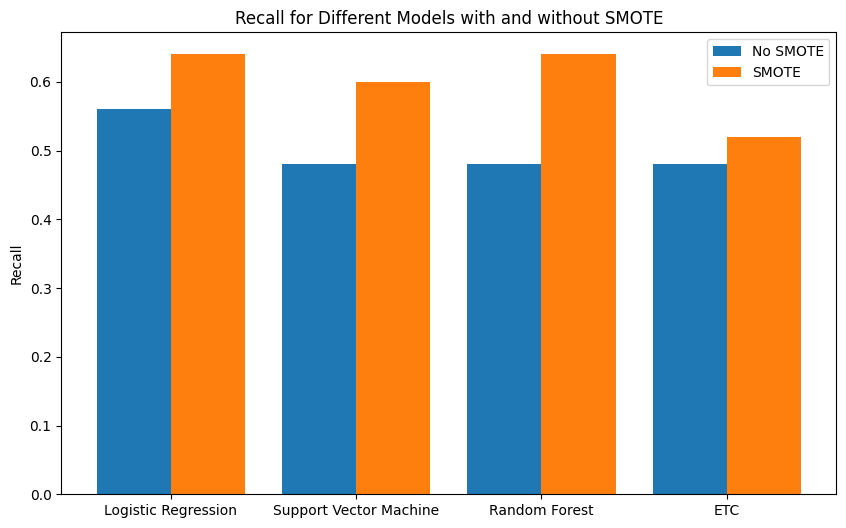

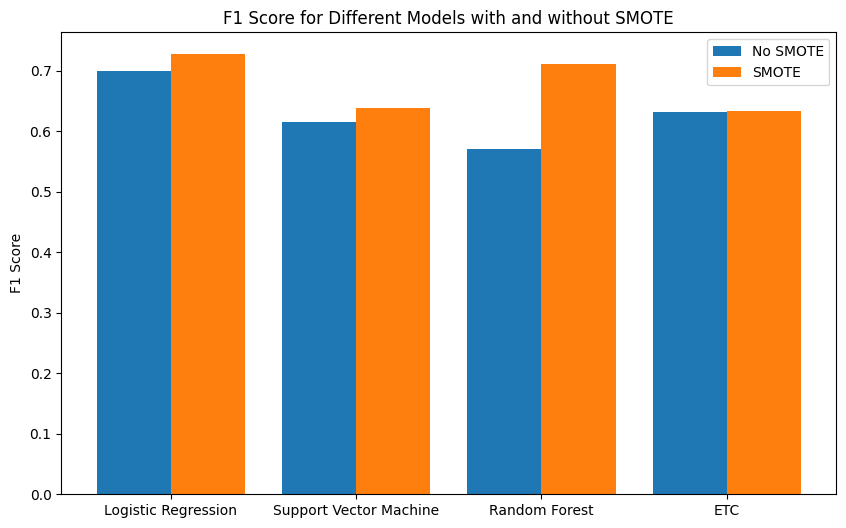

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier


# Load the clinical data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Prepare the data
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the classifiers
classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'ETC':ExtraTreesClassifier(),

}

# Train the models
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Train the models using SMOTE
results_smote = {}
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred_smote = clf.predict(X_test)
    results_smote[name] = {
        'Accuracy': accuracy_score(y_test, y_pred_smote),
        'Precision': precision_score(y_test, y_pred_smote),
        'Recall': recall_score(y_test, y_pred_smote),
        'F1 Score': f1_score(y_test, y_pred_smote)
    }

# Plot the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(results)), [results[name][metric] for name in classifiers.keys()], width=0.4, label='No SMOTE')
    plt.bar(np.arange(len(results)) + 0.4, [results_smote[name][metric] for name in classifiers.keys()], width=0.4, label='SMOTE')
    plt.xticks(np.arange(len(results)) + 0.2, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with and without SMOTE')
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the clinical data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Prepare the data
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Decision-tree':DecisionTreeClassifier(),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}: Accuracy - {accuracy}, Precision - {precision}, Recall - {recall}, F1 Score - {f1}")



Logistic Regression: Accuracy - 0.8, Precision - 0.9333333333333333, Recall - 0.56, F1 Score - 0.7000000000000001
SVM: Accuracy - 0.75, Precision - 0.8571428571428571, Recall - 0.48, F1 Score - 0.6153846153846153
Random Forest: Accuracy - 0.7166666666666667, Precision - 0.7857142857142857, Recall - 0.44, F1 Score - 0.5641025641025641
Extra Trees: Accuracy - 0.7666666666666667, Precision - 0.9230769230769231, Recall - 0.48, F1 Score - 0.631578947368421
Decision-tree: Accuracy - 0.6833333333333333, Precision - 0.6666666666666666, Recall - 0.48, F1 Score - 0.5581395348837209


In [ ]:
from imblearn.over_sampling import ADASYN


# ADASYN to train data

In [ ]:
# Apply ADASYN to the training data
adasyn = ADASYN()
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)


In [ ]:
# Train the models using ADASYN
results_adasyn = {}
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred_adasyn = clf.predict(X_test)
    results_adasyn[name] = {
        'Accuracy': accuracy_score(y_test, y_pred_adasyn),
        'Precision': precision_score(y_test, y_pred_adasyn),
        'Recall': recall_score(y_test, y_pred_adasyn),
        'F1 Score': f1_score(y_test, y_pred_adasyn)
    }


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


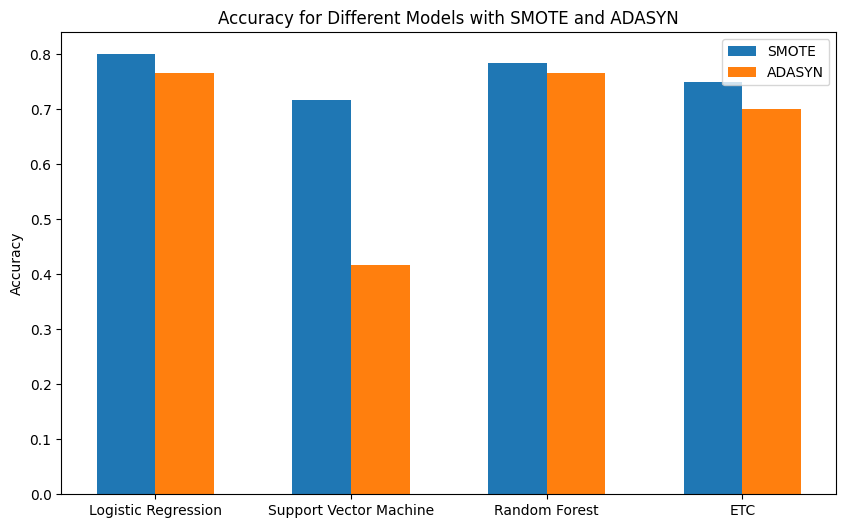

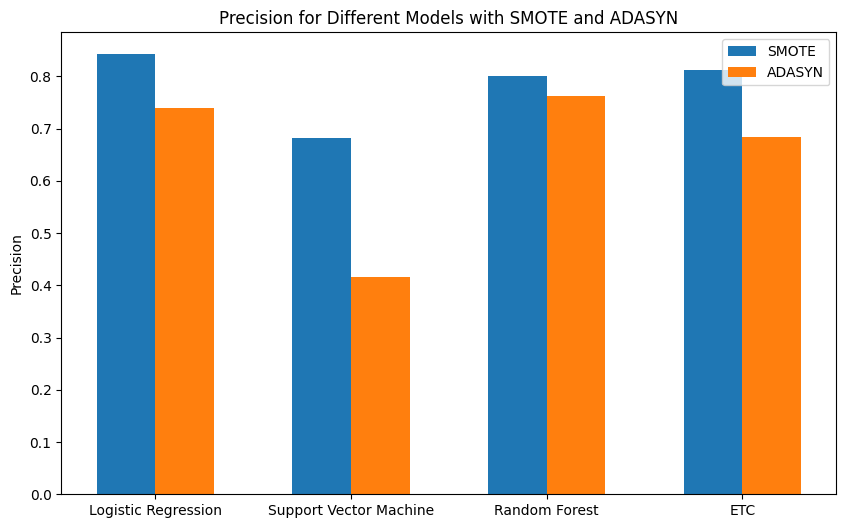

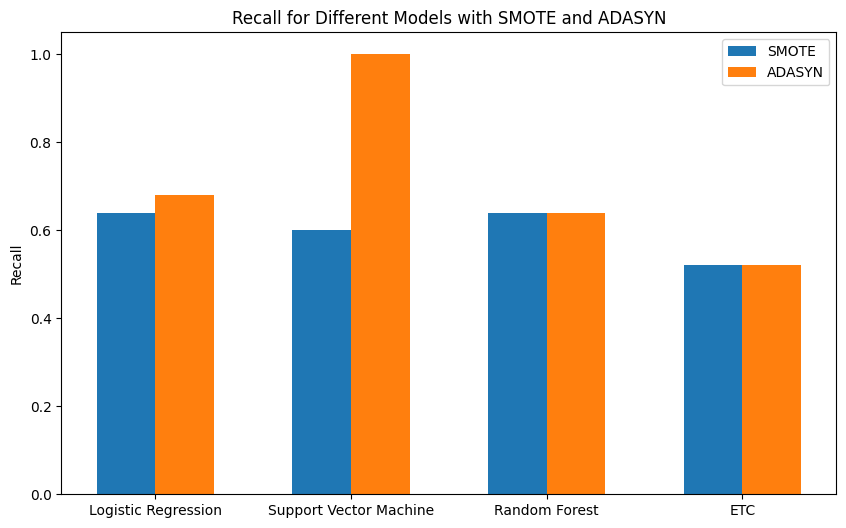

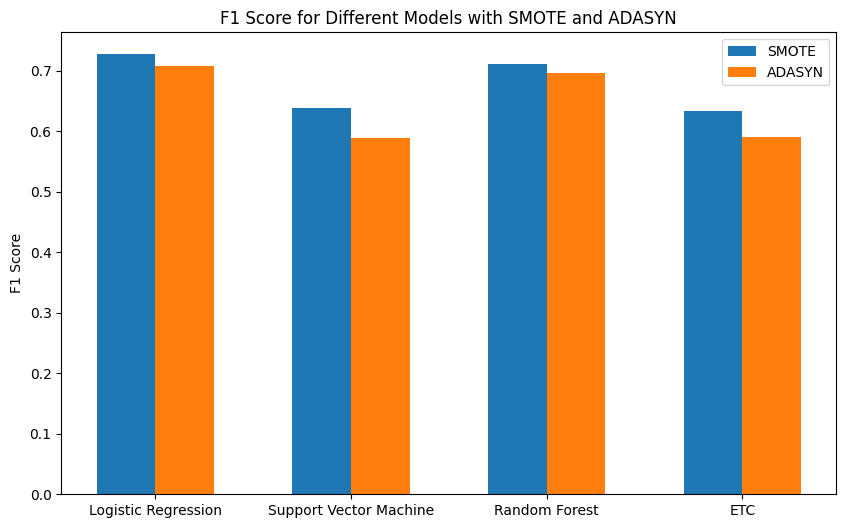

In [ ]:
# Plot the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.6, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score, confusion_matrix

results_adasyn = {}
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred_adasyn = clf.predict(X_test)
    results_adasyn[name] = {
        'Precision': precision_score(y_test, y_pred_adasyn),
        'Recall': recall_score(y_test, y_pred_adasyn),
        'F Measure': fbeta_score(y_test, y_pred_adasyn, beta=1),
        'G Mean': np.sqrt(precision_score(y_test, y_pred_adasyn) * recall_score(y_test, y_pred_adasyn)),
        'OA': accuracy_score(y_test, y_pred_adasyn)
    }



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Print results
for name, metrics in results_adasyn.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Logistic Regression:
Precision: 0.7391304347826086
Recall: 0.68
F Measure: 0.7083333333333334
G Mean: 0.7089490077940542
OA: 0.7666666666666667

Support Vector Machine:
Precision: 0.4166666666666667
Recall: 1.0
F Measure: 0.5882352941176471
G Mean: 0.6454972243679028
OA: 0.4166666666666667

Random Forest:
Precision: 0.7894736842105263
Recall: 0.6
F Measure: 0.6818181818181819
G Mean: 0.6882472016116853
OA: 0.7666666666666667

ETC:
Precision: 0.7058823529411765
Recall: 0.48
F Measure: 0.5714285714285713
G Mean: 0.5820855000871992
OA: 0.7



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score,accuracy_score

In [ ]:
adasyn = ADASYN(random_state=2022)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
print(np.unique(y_resampled,return_counts=True))
xgb = XGBClassifier(random_state=2022)
kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=2022)
#xgb.get_params()
params ={'max_depth':[3,4,5],
         'learning_rate':[0.1,0.5,0.7]}


gcv = GridSearchCV(xgb,param_grid=params,scoring='roc_auc',cv=kfold)
gcv.fit(X_resampled, y_resampled)
print(gcv.best_params_)
print(gcv.best_score_)

bm_ada = gcv.best_estimator_
y_pred_proba = bm_ada.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_proba))

(array([0, 1]), array([168, 180]))
{'learning_rate': 0.5, 'max_depth': 4}
0.9567736185383243
0.8971428571428571


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, fbeta_score, accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN

# Assuming classifiers and X_train_adasyn, y_train_adasyn, X_test, y_test are defined

# Define the classifiers
classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'ETC':ExtraTreesClassifier(),
    'Decision-tree':DecisionTreeClassifier(),
}
# Initialize dictionaries to store results
results_smote = {}
results_adasyn = {}

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Resample using ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred_smote = clf.predict(X_test)
    results_smote[name] = {
        'Precision': precision_score(y_test, y_pred_smote),
        'Recall': recall_score(y_test, y_pred_smote),
        'F Measure': fbeta_score(y_test, y_pred_smote, beta=1),
        'G Mean': np.sqrt(precision_score(y_test, y_pred_smote) * recall_score(y_test, y_pred_smote)),
        'OA': accuracy_score(y_test, y_pred_smote)
    }

    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred_adasyn = clf.predict(X_test)
    results_adasyn[name] = {
        'Precision': precision_score(y_test, y_pred_adasyn),
        'Recall': recall_score(y_test, y_pred_adasyn),
        'F Measure': fbeta_score(y_test, y_pred_adasyn, beta=1),
        'G Mean': np.sqrt(precision_score(y_test, y_pred_adasyn) * recall_score(y_test, y_pred_adasyn)),
        'OA': accuracy_score(y_test, y_pred_adasyn)
    }

# Extract metrics for plotting
precision_smote = [results_smote[name]['Precision'] for name in classifiers]
recall_smote = [results_smote[name]['Recall'] for name in classifiers]
precision_adasyn = [results_adasyn[name]['Precision'] for name in classifiers]
recall_adasyn = [results_adasyn[name]['Recall'] for name in classifiers]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Print results
for name, metrics in results_smote.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Logistic Regression:
Precision: 0.6956521739130435
Recall: 0.64
F Measure: 0.6666666666666666
G Mean: 0.6672461249826392
OA: 0.7333333333333333

Support Vector Machine:
Precision: 0.5
Recall: 0.12
F Measure: 0.1935483870967742
G Mean: 0.2449489742783178
OA: 0.5833333333333334

Random Forest:
Precision: 0.7894736842105263
Recall: 0.6
F Measure: 0.6818181818181819
G Mean: 0.6882472016116853
OA: 0.7666666666666667

ETC:
Precision: 0.8125
Recall: 0.52
F Measure: 0.6341463414634146
G Mean: 0.65
OA: 0.75

Decision-tree:
Precision: 0.7
Recall: 0.56
F Measure: 0.6222222222222222
G Mean: 0.6260990336999411
OA: 0.7166666666666667



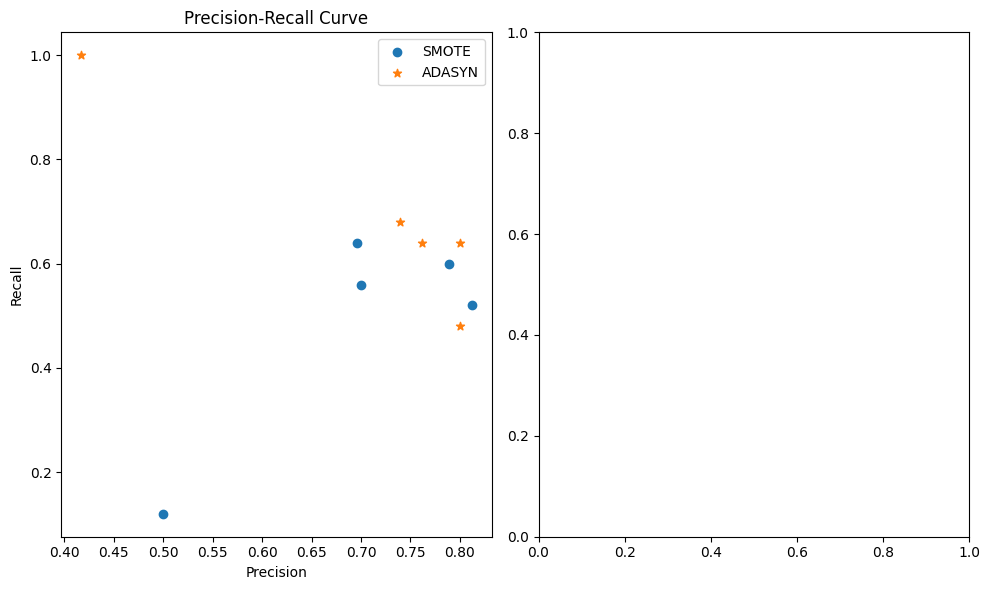

In [ ]:

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(precision_smote, recall_smote, marker='o', linestyle='-', label='SMOTE')
plt.scatter(precision_adasyn, recall_adasyn, marker='*', linestyle='-', label='ADASYN')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1, 2, 2)
# Add more comparison plots if needed

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import ADASYN

# Load the clinical data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Prepare the data
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the classifiers with default hyperparameters
classifiers = {
'Logistic Regression': LogisticRegression(),
'Support Vector Machine': SVC(),
'Random Forest': RandomForestClassifier(),
'ETC':ExtraTreesClassifier(),

}

#Define hyperparameters for grid search
hyperparameters = {
'Logistic Regression': {'C': [0.1, 1, 10]},
'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
'ETC': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},

}
# Perform grid search for hyperparameter optimization
results_gridsearch = {}
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid=hyperparameters[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    results_gridsearch[name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F Measure': fbeta_score(y_test, y_pred, beta=1),
        'G Mean': np.sqrt(precision_score(y_test, y_pred) * recall_score(y_test, y_pred)),
        'OA': accuracy_score(y_test, y_pred),

  }


# Train the models using SMOTE
results_smote = {}
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred_smote = clf.predict(X_test)
    results_smote[name] = {
         'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred_smote),
        'Precision': precision_score(y_test, y_pred_smote),
            'F Measure': fbeta_score(y_test, y_pred, beta=1),
        'G Mean': np.sqrt(precision_score(y_test, y_pred) * recall_score(y_test, y_pred)),
        'OA': accuracy_score(y_test, y_pred),

         }
# Train the models using ADASYN
results_adasyn = {}
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred_adasyn = clf.predict(X_test)
    results_adasyn[name] = {
         'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred_adasyn),
        'Precision': precision_score(y_test, y_pred_adasyn),
              'F Measure': fbeta_score(y_test, y_pred, beta=1),
        'G Mean': np.sqrt(precision_score(y_test, y_pred) * recall_score(y_test, y_pred)),

         'OA': accuracy_score(y_test, y_pred),

          }





/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(results_gridsearch)


{'Logistic Regression': {'Best Parameters': {'C': 1}, 'Accuracy': 0.8, 'Precision': 0.9333333333333333, 'F Measure': 0.7000000000000001, 'G Mean': 0.7229568912920512, 'OA': 0.8}, 'Support Vector Machine': {'Best Parameters': {'C': 10, 'gamma': 0.01}, 'Accuracy': 0.8166666666666667, 'Precision': 0.8888888888888888, 'F Measure': 0.7441860465116279, 'G Mean': 0.7542472332656507, 'OA': 0.8166666666666667}, 'Random Forest': {'Best Parameters': {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}, 'Accuracy': 0.75, 'Precision': 0.8571428571428571, 'F Measure': 0.6153846153846153, 'G Mean': 0.6414269805898185, 'OA': 0.75}, 'ETC': {'Best Parameters': {'max_depth': 20, 'n_estimators': 100}, 'Accuracy': 0.75, 'Precision': 0.9166666666666666, 'F Measure': 0.5945945945945945, 'G Mean': 0.6350852961085883, 'OA': 0.75}}


In [ ]:
print(results_smote)


{'Logistic Regression': {'Best Parameters': {'max_depth': 20, 'n_estimators': 100}, 'Accuracy': 0.7833333333333333, 'Precision': 0.8, 'F Measure': 0.5945945945945945, 'G Mean': 0.6350852961085883, 'OA': 0.75}, 'Support Vector Machine': {'Best Parameters': {'max_depth': 20, 'n_estimators': 100}, 'Accuracy': 0.6833333333333333, 'Precision': 0.6363636363636364, 'F Measure': 0.5945945945945945, 'G Mean': 0.6350852961085883, 'OA': 0.75}, 'Random Forest': {'Best Parameters': {'max_depth': 20, 'n_estimators': 100}, 'Accuracy': 0.7666666666666667, 'Precision': 0.8235294117647058, 'F Measure': 0.5945945945945945, 'G Mean': 0.6350852961085883, 'OA': 0.75}, 'ETC': {'Best Parameters': {'max_depth': 20, 'n_estimators': 100}, 'Accuracy': 0.75, 'Precision': 0.8125, 'F Measure': 0.5945945945945945, 'G Mean': 0.6350852961085883, 'OA': 0.75}}


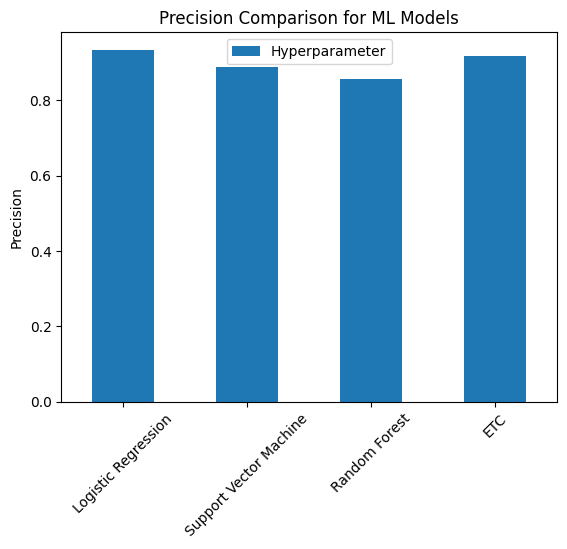

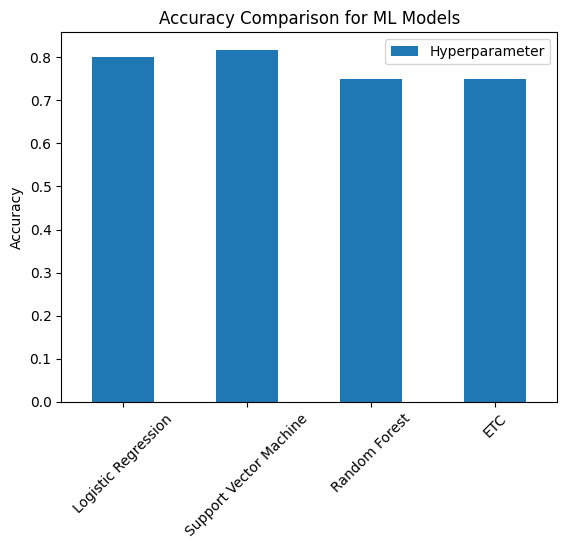

In [ ]:
# Extract the precision and accuracy, F meassure G Mean,and OA results for each method
precision_results = {'Hyperparameter': [results_gridsearch[model]['Precision'] for model in classifiers.keys()],

                  }

accuracy_results = {'Hyperparameter': [results_gridsearch[model]['Accuracy'] for model in classifiers.keys()],
                    }
F_meassure_results = {'Hyperparameter': [results_gridsearch[model]['F Measure'] for model in classifiers.keys()],
                    }

G_means_results = {'Hyperparameter': [results_gridsearch[model]['G Mean'] for model in classifiers.keys()],
                    }

OA_results = {'Hyperparameter': [results_gridsearch[model]['OA'] for model in classifiers.keys()],
                    }




# Create a DataFrame for the results
results_df = pd.DataFrame(precision_results, index=classifiers.keys())

# Plot the precision results
results_df.plot(kind='bar', title='Precision Comparison for ML Models', ylabel='Precision', grid=False)
plt.xticks(rotation=45)
plt.show()

# Create a DataFrame for the accuracy results
results_df = pd.DataFrame(accuracy_results, index=classifiers.keys())

# Plot the accuracy results
results_df.plot(kind='bar', title='Accuracy Comparison for ML Models', ylabel='Accuracy', grid=False)
plt.xticks(rotation=45)
plt.show()


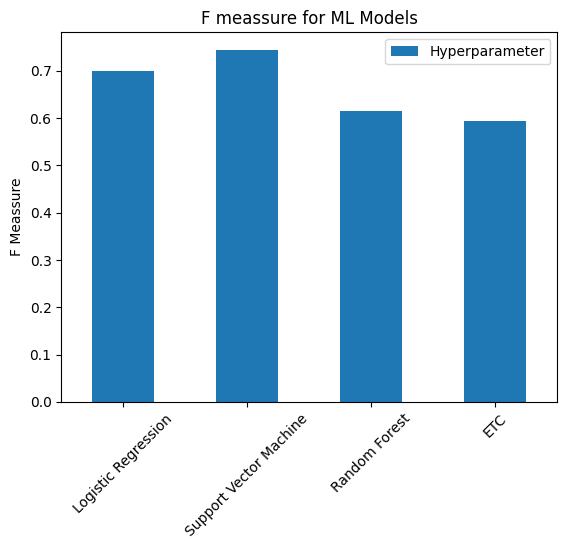

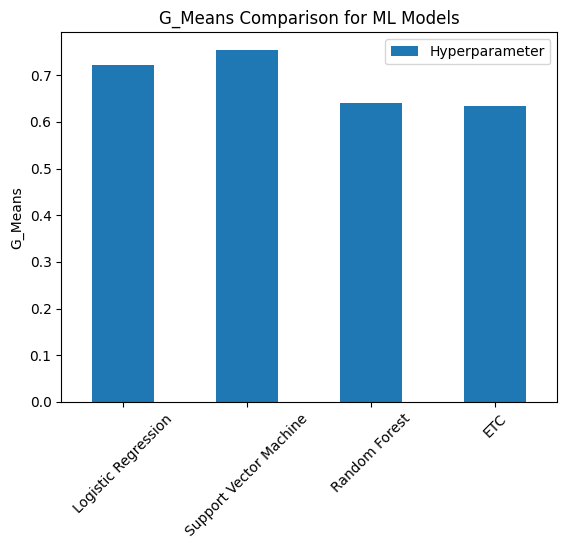

In [ ]:


# Create a DataFrame for the results
results_df = pd.DataFrame(F_meassure_results, index=classifiers.keys())

# Plot the F_Meassure results
results_df.plot(kind='bar', title='F meassure for ML Models', ylabel='F Meassure', grid=False)
plt.xticks(rotation=45)
plt.show()

# Create a DataFrame for the G means results
results_df = pd.DataFrame(G_means_results, index=classifiers.keys())

# Plot the G means results
results_df.plot(kind='bar', title='G_Means Comparison for ML Models', ylabel='G_Means', grid=False)
plt.xticks(rotation=45)
plt.show()

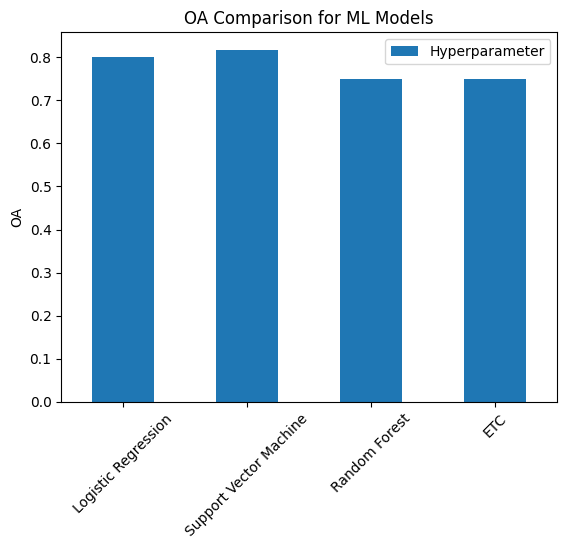

In [ ]:

# Create a DataFrame for the G means results
results_df = pd.DataFrame(OA_results, index=classifiers.keys())

# Plot the G means results
results_df.plot(kind='bar', title='OA Comparison for ML Models', ylabel='OA', grid=False)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Print results
for name, metrics in results_gridsearch.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Logistic Regression:
Best Parameters: {'C': 1}
Accuracy: 0.8
Precision: 0.9333333333333333
F Measure: 0.7000000000000001
G Mean: 0.7229568912920512
OA: 0.8

Support Vector Machine:
Best Parameters: {'C': 10, 'gamma': 0.01}
Accuracy: 0.8166666666666667
Precision: 0.8888888888888888
F Measure: 0.7441860465116279
G Mean: 0.7542472332656507
OA: 0.8166666666666667

Random Forest:
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.75
Precision: 0.8571428571428571
F Measure: 0.6153846153846153
G Mean: 0.6414269805898185
OA: 0.75

ETC:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.75
Precision: 0.9166666666666666
F Measure: 0.5945945945945945
G Mean: 0.6350852961085883
OA: 0.75



In [ ]:

# Print results
for name, metrics in results_smote.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Logistic Regression:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.7833333333333333
Precision: 0.8
F Measure: 0.5945945945945945
G Mean: 0.6350852961085883
OA: 0.75

Support Vector Machine:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.6833333333333333
Precision: 0.6363636363636364
F Measure: 0.5945945945945945
G Mean: 0.6350852961085883
OA: 0.75

Random Forest:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.7666666666666667
Precision: 0.8235294117647058
F Measure: 0.5945945945945945
G Mean: 0.6350852961085883
OA: 0.75

ETC:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.75
Precision: 0.8125
F Measure: 0.5945945945945945
G Mean: 0.6350852961085883
OA: 0.75



In [ ]:
# Print results
for name, metrics in results_adasyn.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Logistic Regression:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.6666666666666666
Precision: 0.5806451612903226
F Measure: 0.5945945945945945
G Mean: 0.6350852961085883
OA: 0.75

Support Vector Machine:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.4166666666666667
Precision: 0.4166666666666667
F Measure: 0.5945945945945945
G Mean: 0.6350852961085883
OA: 0.75

Random Forest:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.4
Precision: 0.39622641509433965
F Measure: 0.5945945945945945
G Mean: 0.6350852961085883
OA: 0.75

ETC:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.4166666666666667
Precision: 0.4166666666666667
F Measure: 0.5945945945945945
G Mean: 0.6350852961085883
OA: 0.75



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import ADASYN

# Load the clinical data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Prepare the data
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the classifiers with default hyperparameters
classifiers = {
'Logistic Regression': LogisticRegression(),
'Support Vector Machine': SVC(),
'Random Forest': RandomForestClassifier(),
'ETC':ExtraTreesClassifier(),

}

#Define hyperparameters for grid search
hyperparameters = {
'Logistic Regression': {'C': [0.1, 1, 10]},
'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
'ETC': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},

}
# Perform grid search for hyperparameter optimization
results_gridsearch = {}
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid=hyperparameters[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    results_gridsearch[name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'OA': accuracy_score(y_test, y_pred),

  }


# Train the models using SMOTE
results_smote = {}
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred_smote = clf.predict(X_test)
    results_smote[name] = {
         'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred_smote),
        'Precision': precision_score(y_test, y_pred_smote),
        'OA': accuracy_score(y_test, y_pred),

         }
# Train the models using ADASYN
results_adasyn = {}
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred_adasyn = clf.predict(X_test)
    results_adasyn[name] = {
         'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred_adasyn),
        'Precision': precision_score(y_test, y_pred_adasyn),
        'OA': accuracy_score(y_test, y_pred),

          }





/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


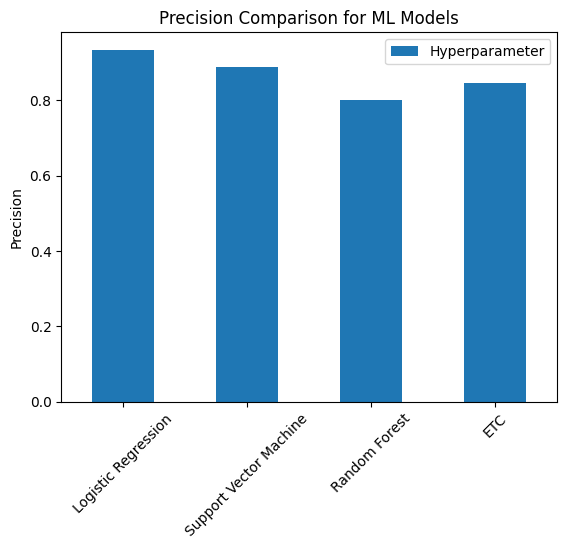

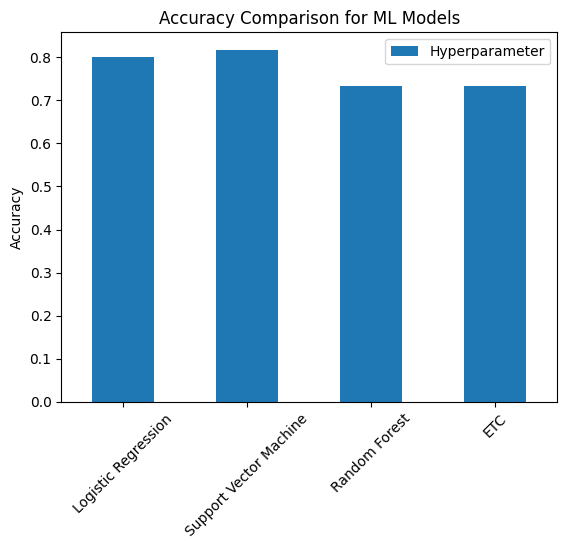

In [ ]:
# Extract the precision and accuracy, F meassure G Mean,and OA results for each method
precision_results = {'Hyperparameter': [results_gridsearch[model]['Precision'] for model in classifiers.keys()],

                  }

accuracy_results = {'Hyperparameter': [results_gridsearch[model]['Accuracy'] for model in classifiers.keys()],
                    }
OA_results = {'Hyperparameter': [results_gridsearch[model]['OA'] for model in classifiers.keys()],
                    }




# Create a DataFrame for the results
results_df = pd.DataFrame(precision_results, index=classifiers.keys())

# Plot the precision results
results_df.plot(kind='bar', title='Precision Comparison for ML Models', ylabel='Precision', grid=False)
plt.xticks(rotation=45)
plt.show()

# Create a DataFrame for the accuracy results
results_df = pd.DataFrame(accuracy_results, index=classifiers.keys())

# Plot the accuracy results
results_df.plot(kind='bar', title='Accuracy Comparison for ML Models', ylabel='Accuracy', grid=False)
plt.xticks(rotation=45)
plt.show()


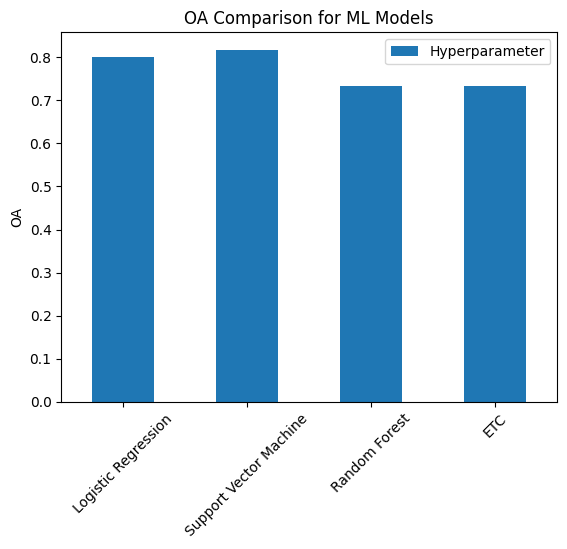

In [ ]:

# Create a DataFrame for the G means results
results_df = pd.DataFrame(OA_results, index=classifiers.keys())

# Plot the G means results
results_df.plot(kind='bar', title='OA Comparison for ML Models', ylabel='OA', grid=False)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Print results
for name, metrics in results_gridsearch.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Logistic Regression:
Best Parameters: {'C': 1}
Accuracy: 0.8
Precision: 0.9333333333333333
OA: 0.8

Support Vector Machine:
Best Parameters: {'C': 10, 'gamma': 0.01}
Accuracy: 0.8166666666666667
Precision: 0.8888888888888888
OA: 0.8166666666666667

Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.7333333333333333
Precision: 0.8
OA: 0.7333333333333333

ETC:
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.7333333333333333
Precision: 0.8461538461538461
OA: 0.7333333333333333



In [ ]:

# Resample using ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred_smote = clf.predict(X_test)
    results_smote[name] = {
         'Accuracy': accuracy_score(y_test, y_pred_adasyn),
        'Precision': precision_score(y_test, y_pred_smote),
         'OA': accuracy_score(y_test, y_pred_smote)
    }

    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred_adasyn = clf.predict(X_test)
    results_adasyn[name] = {
        'Accuracy': accuracy_score(y_test, y_pred_adasyn),
        'Precision': precision_score(y_test, y_pred_adasyn),
        'OA': accuracy_score(y_test, y_pred),

    }
# Print results
for name, metrics in results_adasyn.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()




Logistic Regression:
Accuracy: 0.8
Precision: 0.8421052631578947
OA: 0.7333333333333333

Support Vector Machine:
Accuracy: 0.6833333333333333
Precision: 0.6363636363636364
OA: 0.7333333333333333

Random Forest:
Accuracy: 0.7666666666666667
Precision: 0.7894736842105263
OA: 0.7333333333333333

ETC:
Accuracy: 0.7166666666666667
Precision: 0.75
OA: 0.7333333333333333



In [ ]:
# Print results
for name, metrics in results_smote.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Logistic Regression:
Accuracy: 0.4166666666666667
Precision: 0.8
OA: 0.7833333333333333

Support Vector Machine:
Accuracy: 0.8
Precision: 0.6818181818181818
OA: 0.7166666666666667

Random Forest:
Accuracy: 0.6833333333333333
Precision: 0.7894736842105263
OA: 0.7666666666666667

ETC:
Accuracy: 0.7666666666666667
Precision: 0.8125
OA: 0.75



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import ADASYN

# Load the clinical data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Prepare the data
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the classifiers with default hyperparameters
classifiers = {
'Logistic Regression': LogisticRegression(),
'Support Vector Machine': SVC(),
'Random Forest': RandomForestClassifier(),
'ETC':ExtraTreesClassifier(),

}

#Define hyperparameters for grid search
hyperparameters = {
'Logistic Regression': {'C': [0.1, 1, 10]},
'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
'ETC': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},

}
# Perform grid search for hyperparameter optimization
results_gridsearch = {}
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid=hyperparameters[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    results_gridsearch[name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'OA': accuracy_score(y_test, y_pred),

  }


# Train the models using SMOTE
results_smote = {}
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred_smote = clf.predict(X_test)
    results_smote[name] = {
         'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred_smote),
        'Precision': precision_score(y_test, y_pred_smote),
        'OA': accuracy_score(y_test, y_pred),

         }
# Train the models using ADASYN
results_adasyn = {}
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred_adasyn = clf.predict(X_test)
    results_adasyn[name] = {
         'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred_adasyn),
        'Precision': precision_score(y_test, y_pred_adasyn),
        'OA': accuracy_score(y_test, y_pred),

          }

          # Train the models
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'OA': accuracy_score(y_test, y_pred),

    }







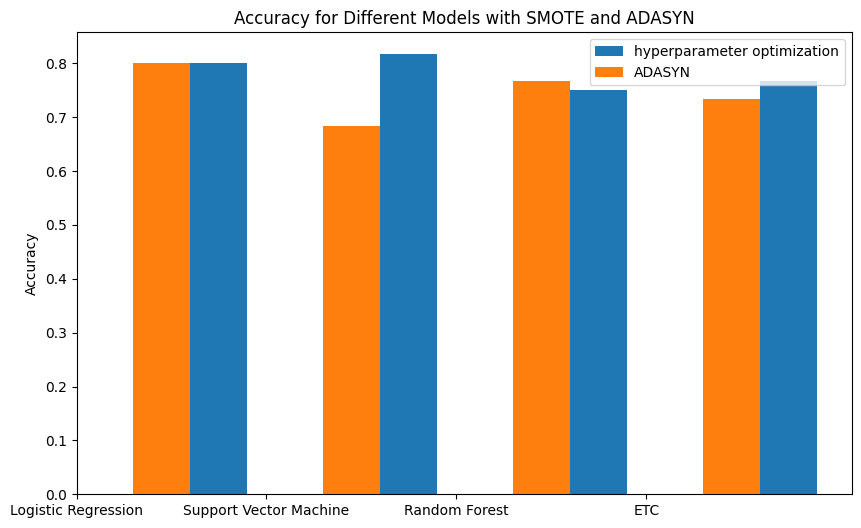

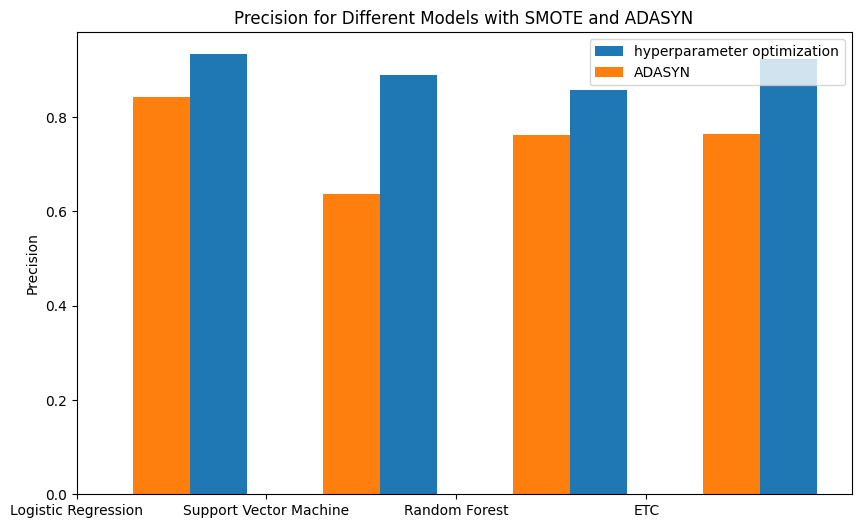

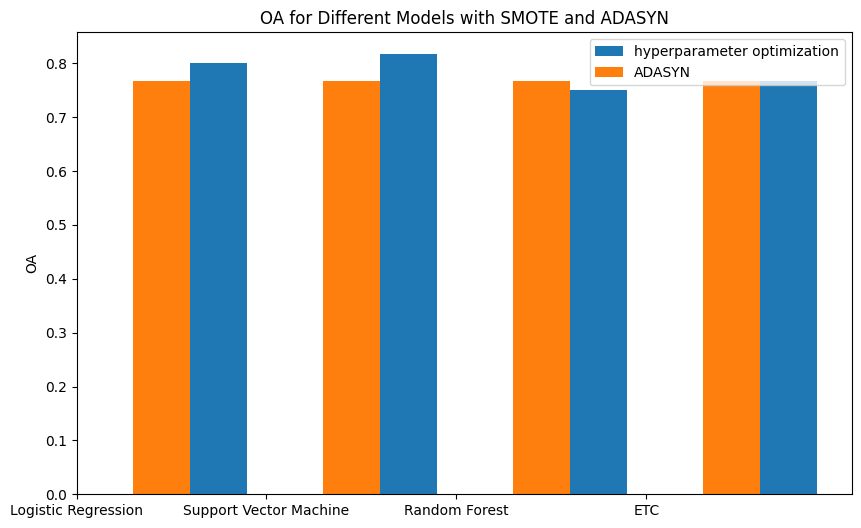

In [ ]:
# Plot the results
metrics = ['Accuracy', 'Precision', 'OA']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 1.2, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    plt.bar(np.arange(len(results)) + 0.9, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    #plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()


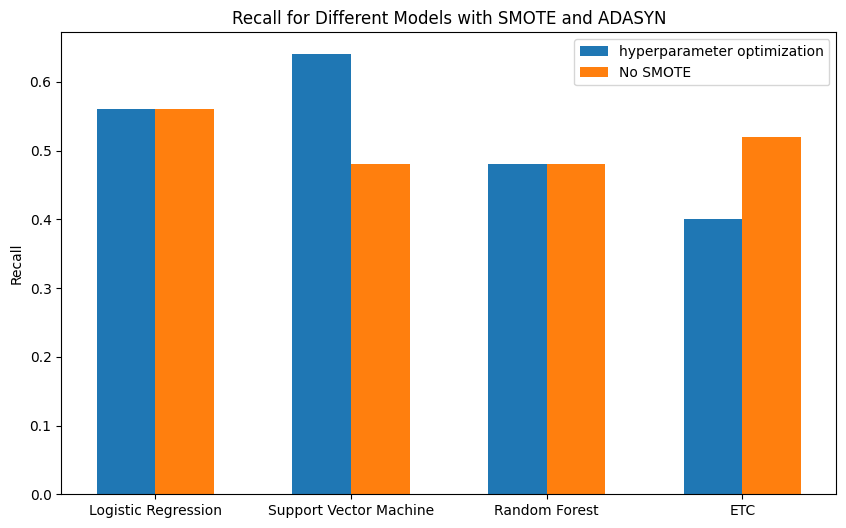

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import ADASYN

# Load the clinical data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Prepare the data
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize dictionaries to store results
results_smote = {}
results_adasyn = {}
# Resample using ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)



# Define the classifiers with default hyperparameters
classifiers = {
'Logistic Regression': LogisticRegression(),
'Support Vector Machine': SVC(),
'Random Forest': RandomForestClassifier(),
'ETC':ExtraTreesClassifier(),

}

#Define hyperparameters for grid search
hyperparameters = {
'Logistic Regression': {'C': [0.1, 1, 10]},
'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
'ETC': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},

}
# Perform grid search for hyperparameter optimization
results_gridsearch = {}
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid=hyperparameters[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    results_gridsearch[name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'OA': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)


  }


# Train the models using SMOTE
results_smote = {}
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred_smote = clf.predict(X_test)
    results_smote[name] = {
         'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred_smote),
        'Precision': precision_score(y_test, y_pred_smote),
        'OA': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)


         }
# Train the models using ADASYN
results_adasyn = {}
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred_adasyn = clf.predict(X_test)
    results_adasyn[name] = {
         'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred_adasyn),
        'Precision': precision_score(y_test, y_pred_adasyn),
        'OA': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)


          }

          # Train the models
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'OA': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)


    }



# Plot the results
metrics = ['Recall']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 0.9, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()




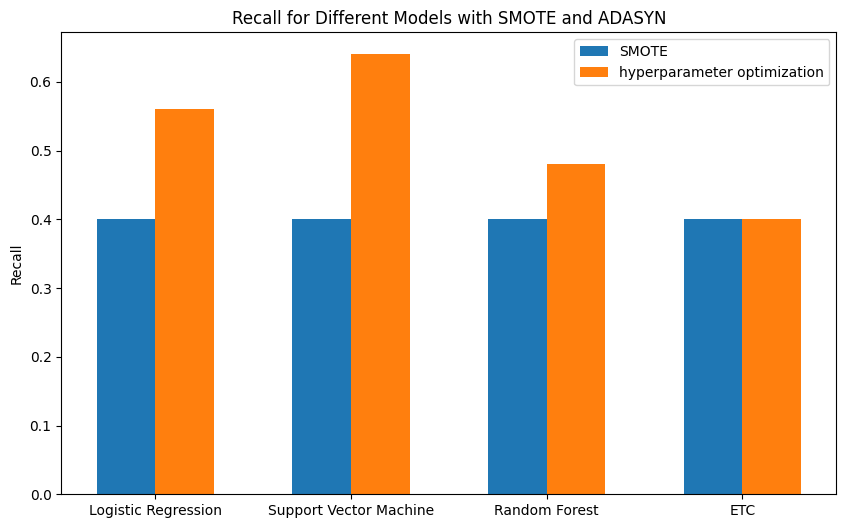

In [ ]:

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.6, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 0.9, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    #plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()




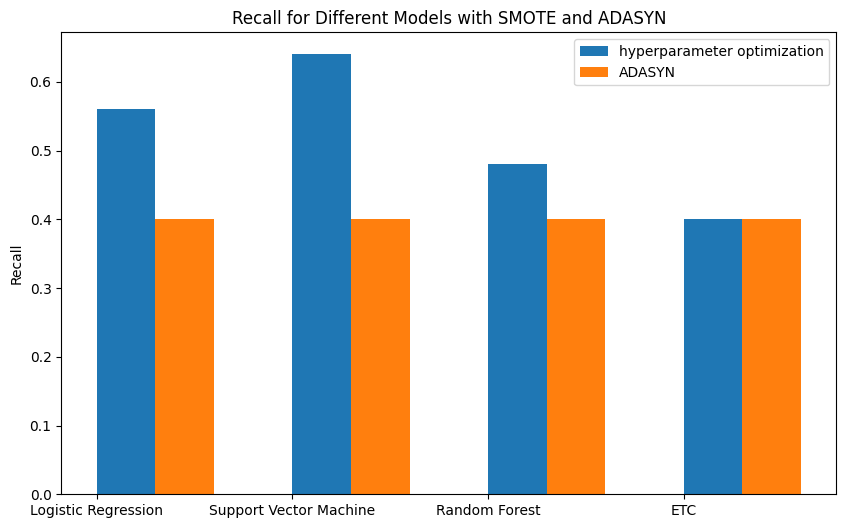

In [ ]:

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.6, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    plt.bar(np.arange(len(results)) + 0.9, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    #plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()




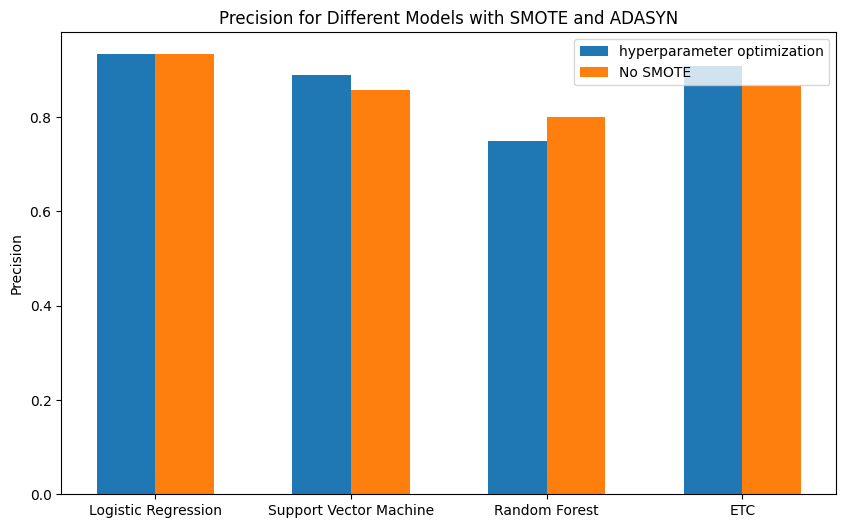

In [ ]:


# Plot the results
metrics = ['Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 0.9, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()




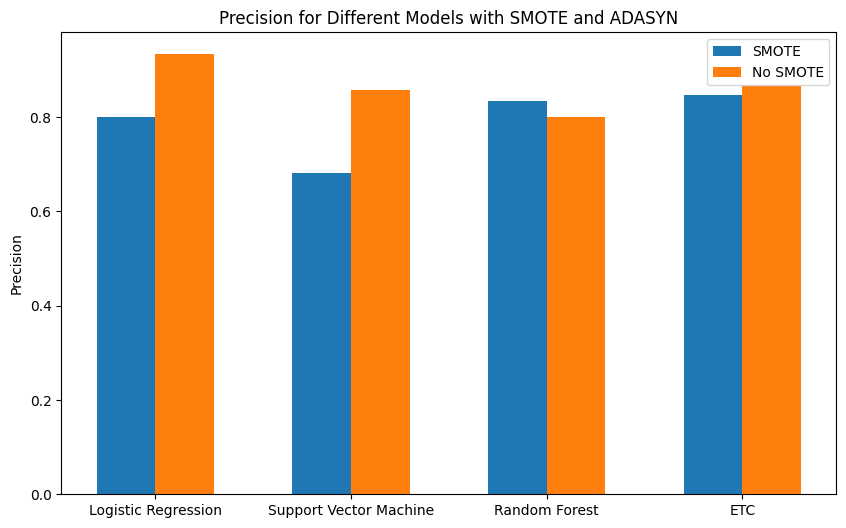

In [ ]:


# Plot the results
metrics = ['Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    #plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 0.9, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()




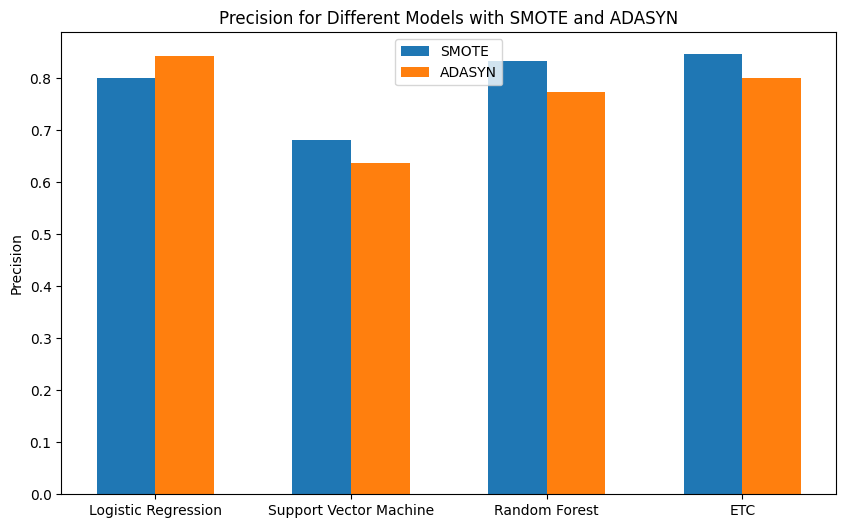

In [ ]:


# Plot the results
metrics = ['Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    #plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    plt.bar(np.arange(len(results)) + 0.6, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    #plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()




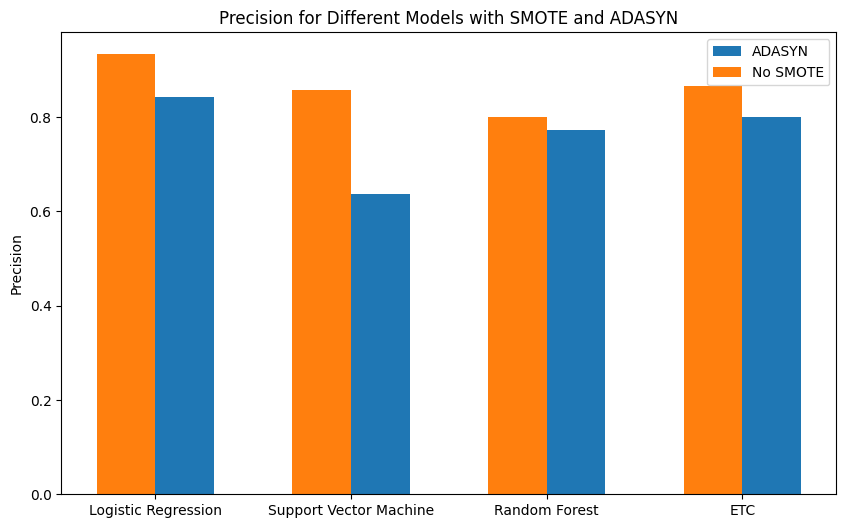

In [ ]:


# Plot the results
metrics = ['Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    #plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    plt.bar(np.arange(len(results)) + 0.6, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.3 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()




In [ ]:
# Print results
for name, metrics in results_gridsearch.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Logistic Regression:
Best Parameters: {'C': 1}
Accuracy: 0.8
Precision: 0.9333333333333333
OA: 0.8
Recall: 0.56
F1 Score: 0.7000000000000001

Support Vector Machine:
Best Parameters: {'C': 10, 'gamma': 0.01}
Accuracy: 0.8166666666666667
Precision: 0.8888888888888888
OA: 0.8166666666666667
Recall: 0.64
F1 Score: 0.7441860465116279

Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7166666666666667
Precision: 0.75
OA: 0.7166666666666667
Recall: 0.48
F1 Score: 0.5853658536585366

ETC:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 0.7333333333333333
Precision: 0.9090909090909091
OA: 0.7333333333333333
Recall: 0.4
F1 Score: 0.5555555555555556



In [ ]:
# Print results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Logistic Regression:
Accuracy: 0.8
Precision: 0.9333333333333333
OA: 0.8
Recall: 0.56
F1 Score: 0.7000000000000001

Support Vector Machine:
Accuracy: 0.75
Precision: 0.8571428571428571
OA: 0.75
Recall: 0.48
F1 Score: 0.6153846153846153

Random Forest:
Accuracy: 0.7333333333333333
Precision: 0.8
OA: 0.7333333333333333
Recall: 0.48
F1 Score: 0.6

ETC:
Accuracy: 0.7666666666666667
Precision: 0.8666666666666667
OA: 0.7666666666666667
Recall: 0.52
F1 Score: 0.65



In [ ]:
# Print results
for name, metrics in results_smote.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Logistic Regression:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 0.7833333333333333
Precision: 0.8
OA: 0.7333333333333333
Recall: 0.4
F1 Score: 0.5555555555555556

Support Vector Machine:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 0.7166666666666667
Precision: 0.6818181818181818
OA: 0.7333333333333333
Recall: 0.4
F1 Score: 0.5555555555555556

Random Forest:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 0.7833333333333333
Precision: 0.8333333333333334
OA: 0.7333333333333333
Recall: 0.4
F1 Score: 0.5555555555555556

ETC:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 0.7333333333333333
Precision: 0.8461538461538461
OA: 0.7333333333333333
Recall: 0.4
F1 Score: 0.5555555555555556



In [ ]:
# Print results
for name, metrics in results_adasyn.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


Logistic Regression:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 0.8
Precision: 0.8421052631578947
OA: 0.7333333333333333
Recall: 0.4
F1 Score: 0.5555555555555556

Support Vector Machine:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 0.6833333333333333
Precision: 0.6363636363636364
OA: 0.7333333333333333
Recall: 0.4
F1 Score: 0.5555555555555556

Random Forest:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 0.7833333333333333
Precision: 0.7727272727272727
OA: 0.7333333333333333
Recall: 0.4
F1 Score: 0.5555555555555556

ETC:
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 0.7333333333333333
Precision: 0.8
OA: 0.7333333333333333
Recall: 0.4
F1 Score: 0.5555555555555556



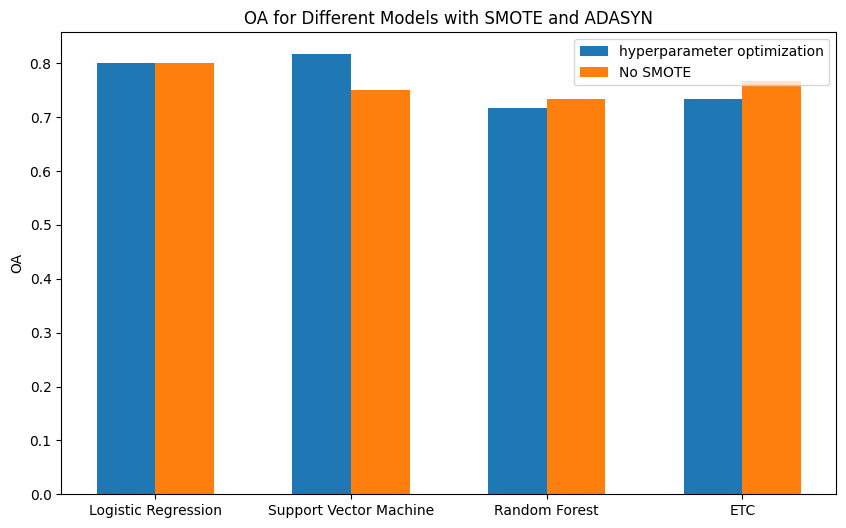

In [ ]:
metrics = ['OA']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 0.9, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()


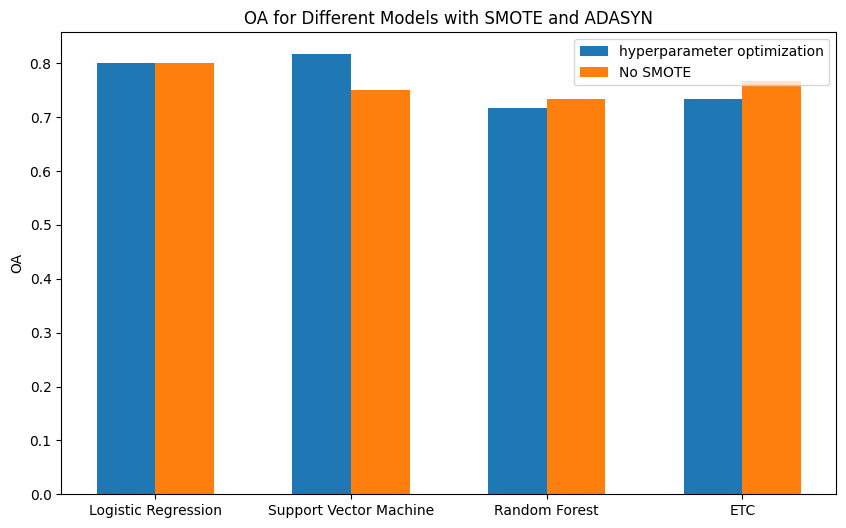

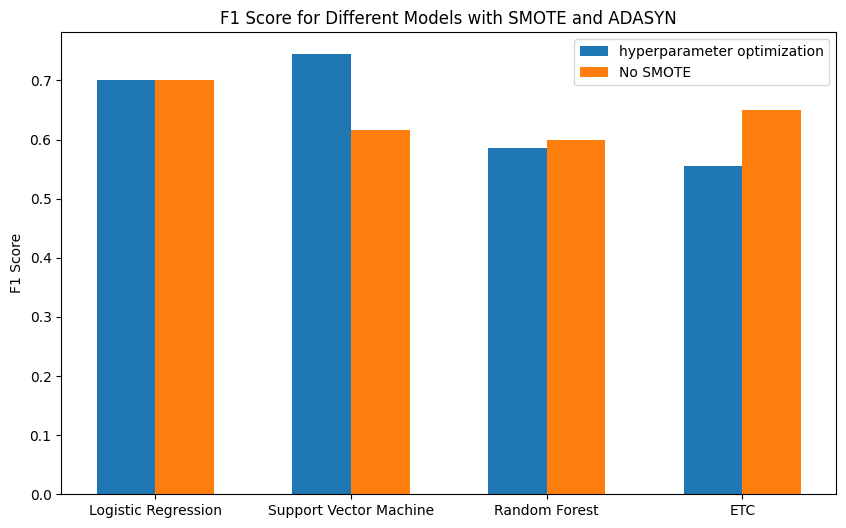

In [ ]:
metrics = ['OA','F1 Score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 0.9, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()


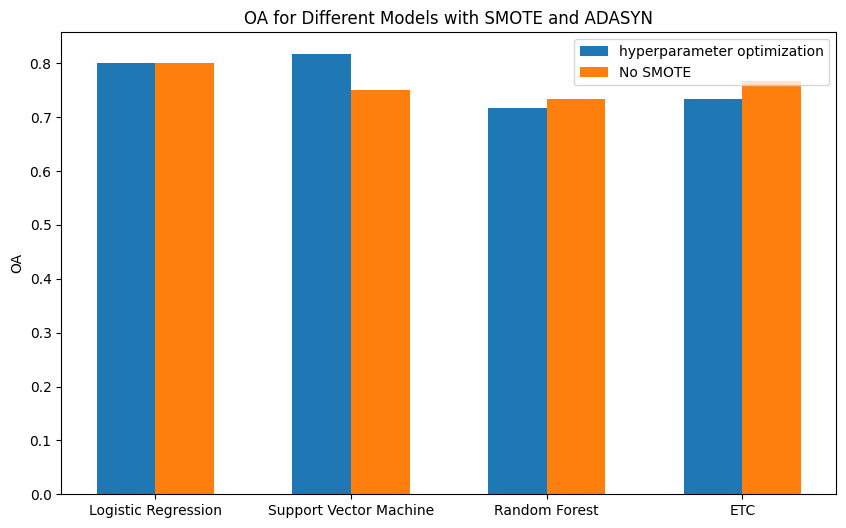

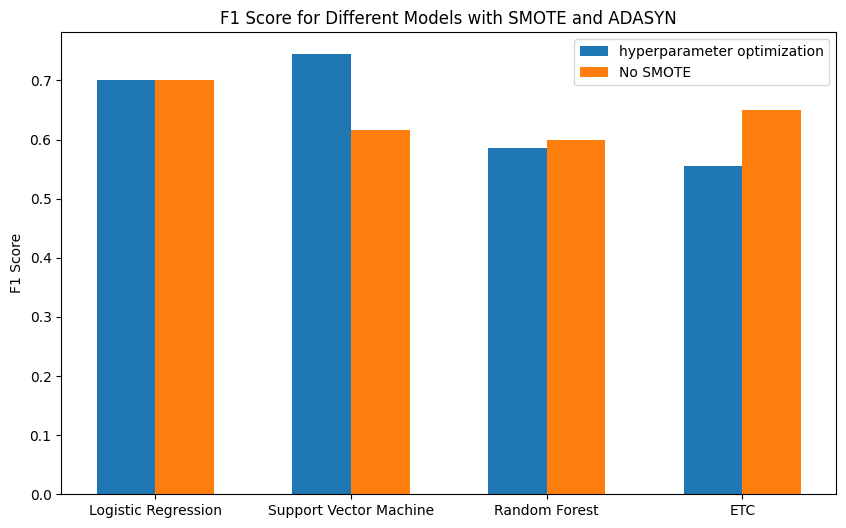

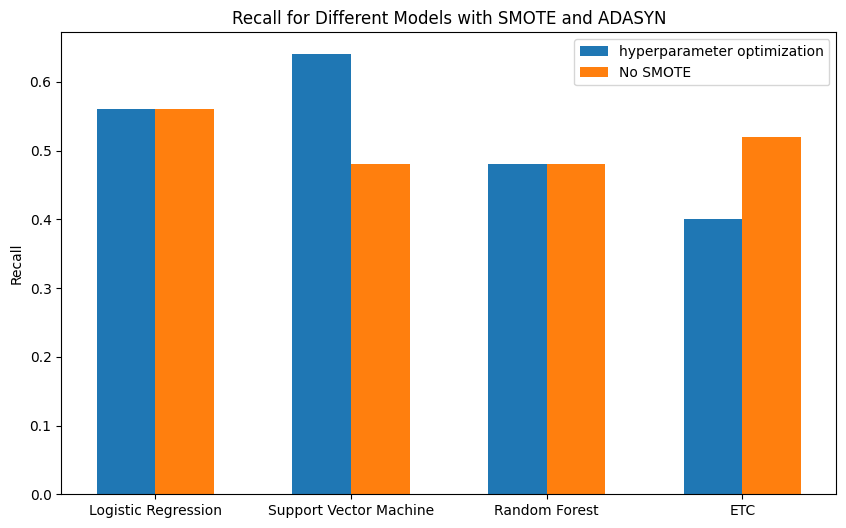

In [ ]:
metrics = ['OA','F1 Score', 'Recall']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.9, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 1.2, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()


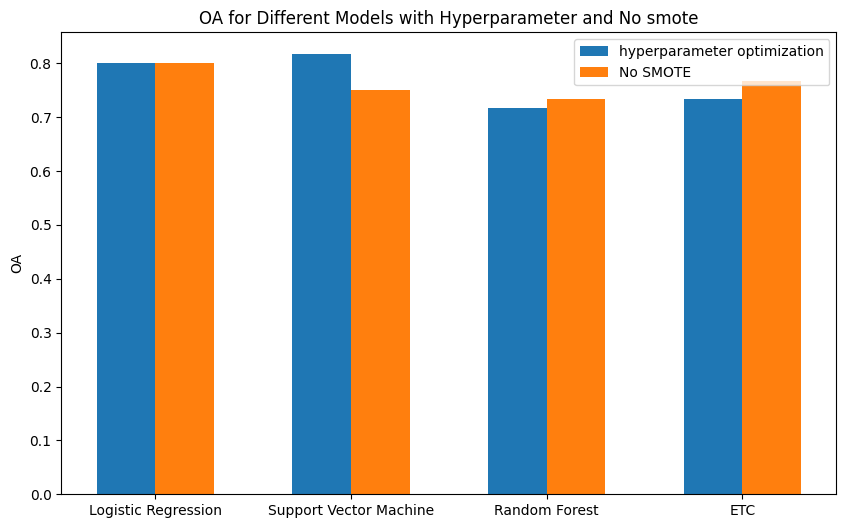

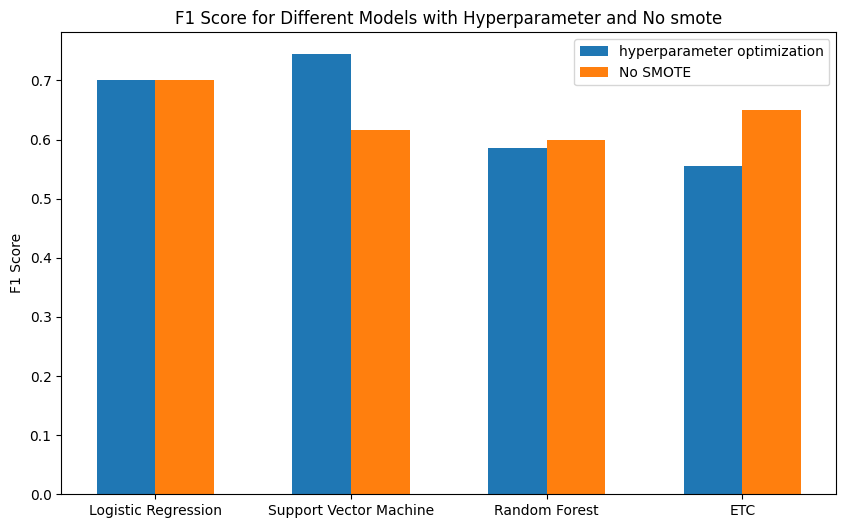

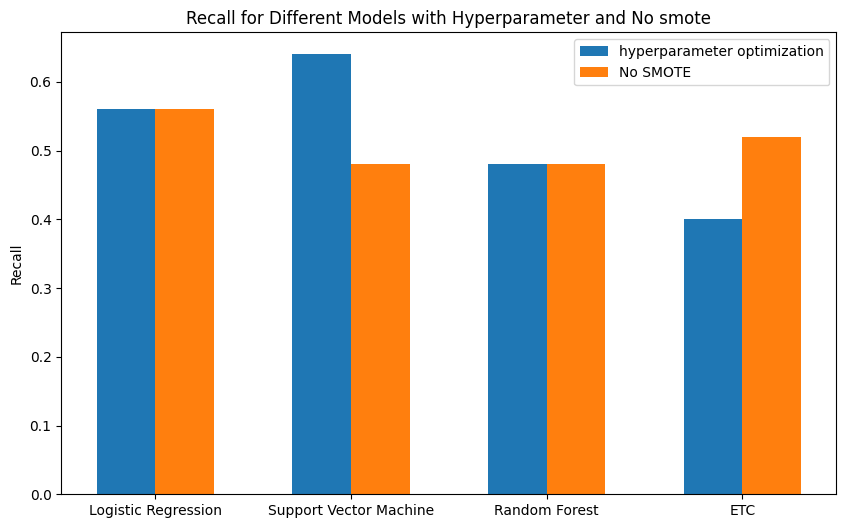

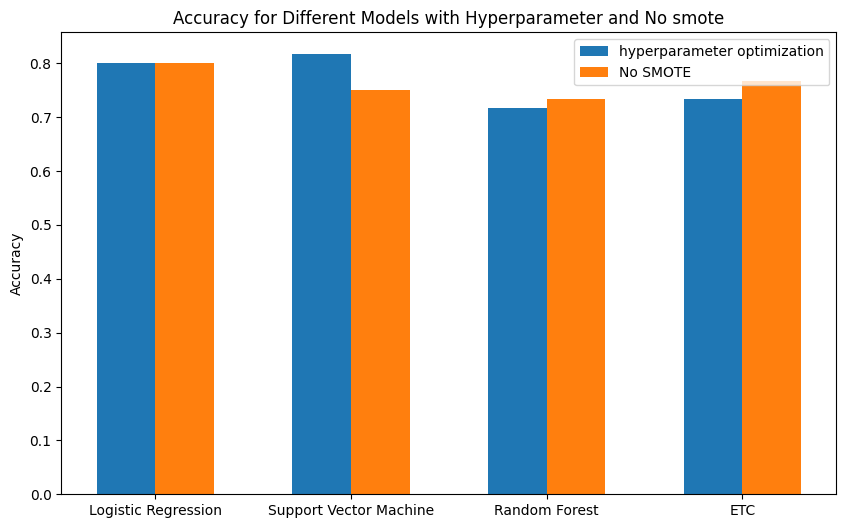

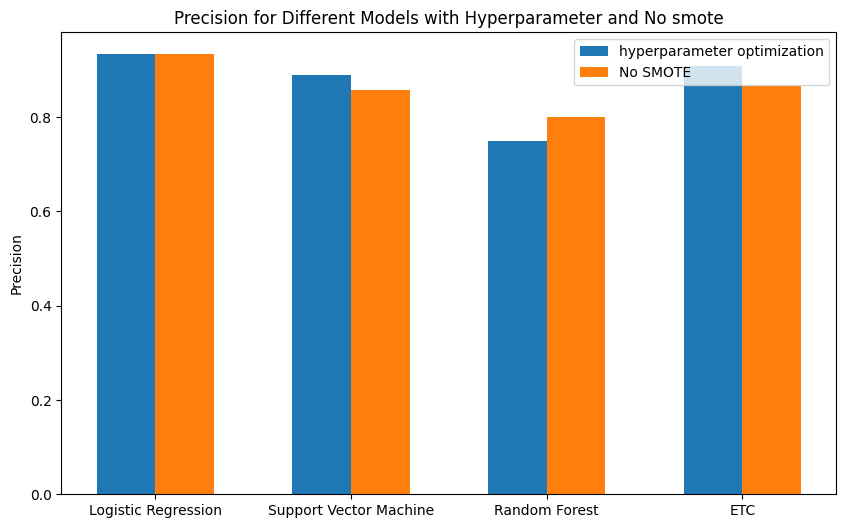

In [ ]:
metrics = ['OA','F1 Score', 'Recall', 'Accuracy', 'Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.9, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 1.2, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with Hyperparameter and No smote')
    plt.legend()
    plt.show()


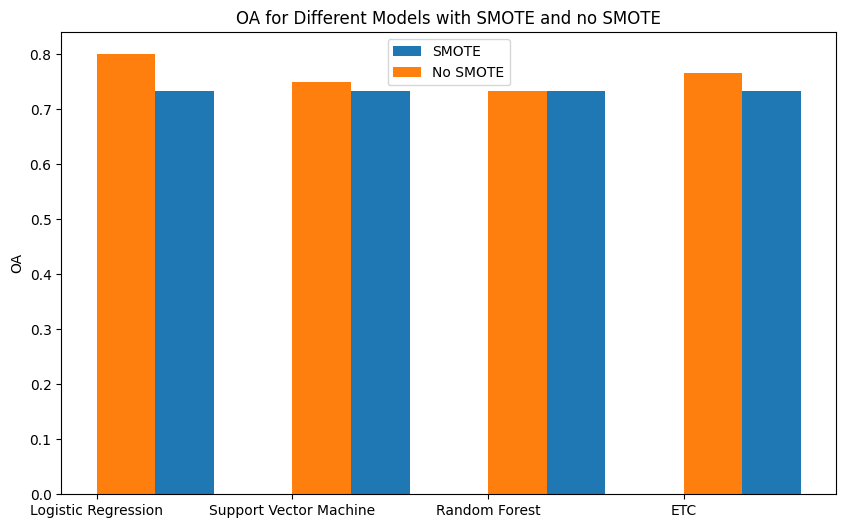

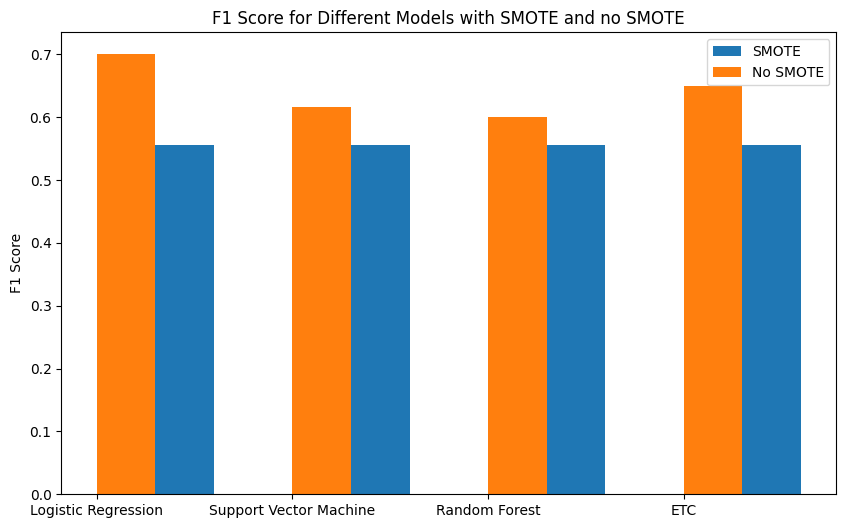

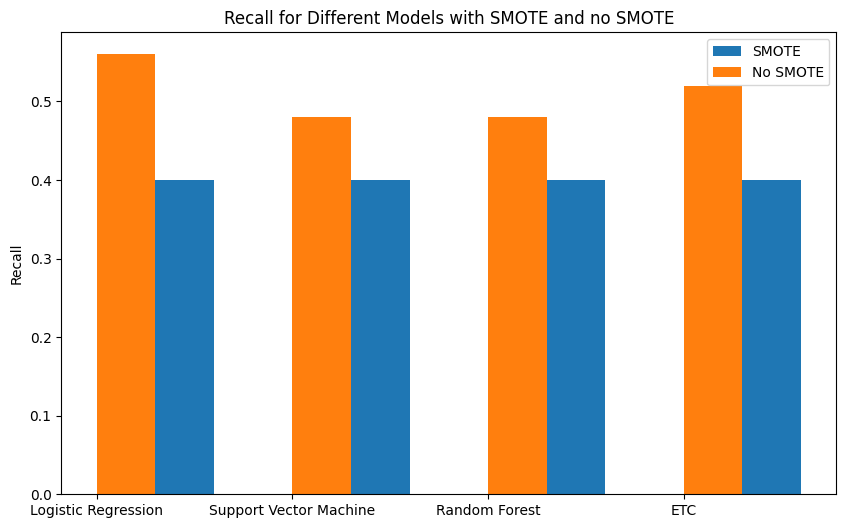

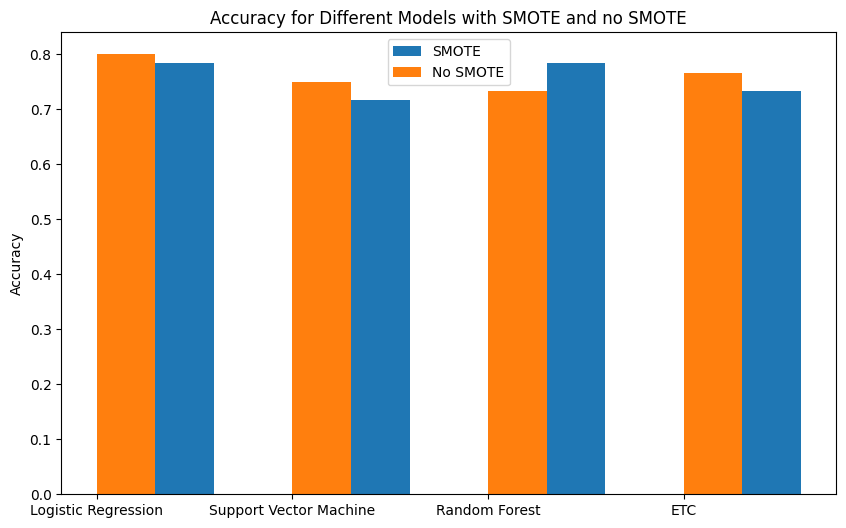

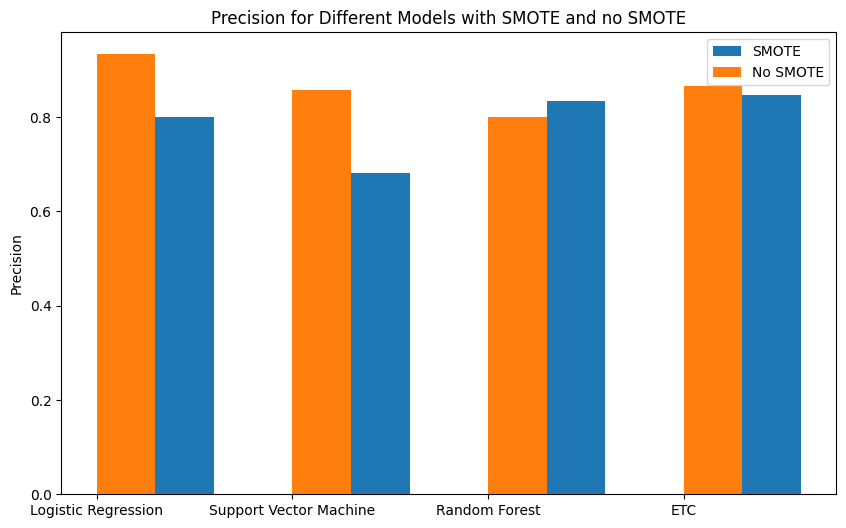

In [ ]:
metrics = ['OA','F1 Score', 'Recall', 'Accuracy', 'Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(results)) + 0.9, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    #plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 1.2, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and no SMOTE')
    plt.legend()
    plt.show()


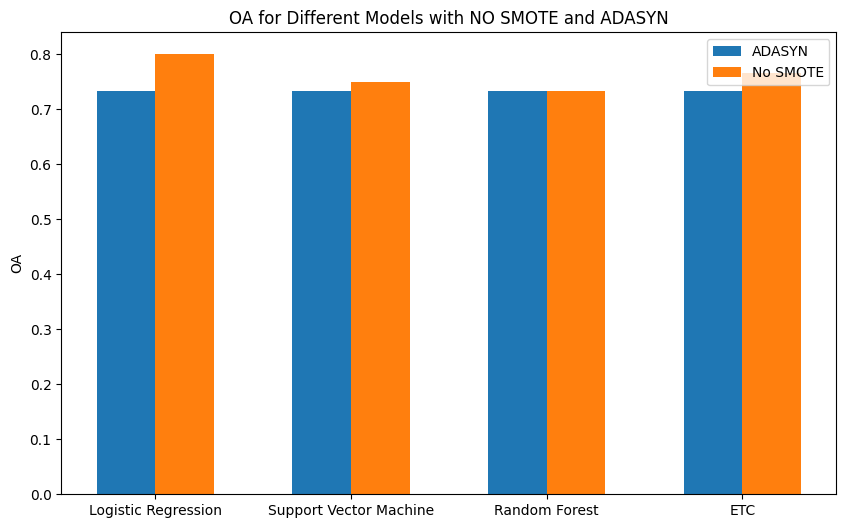

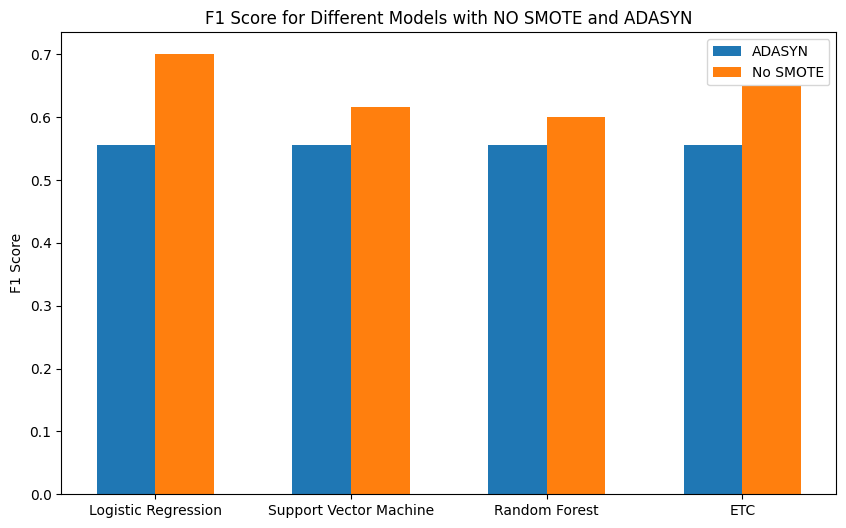

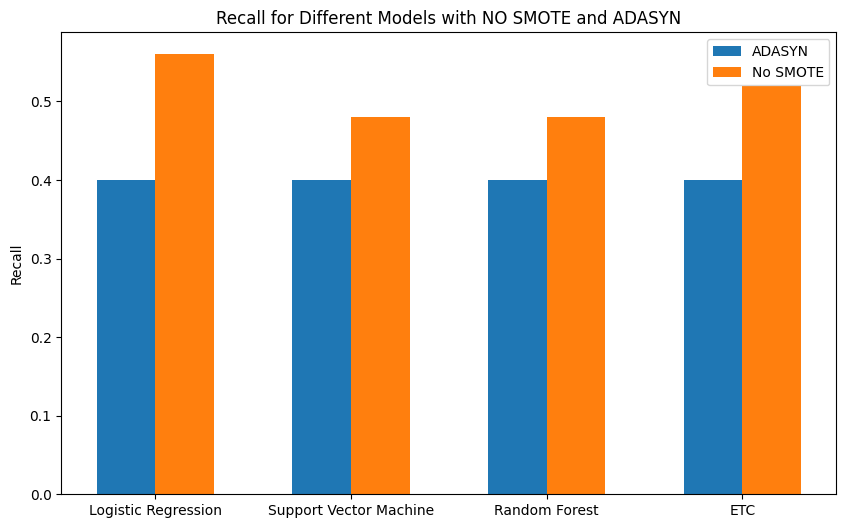

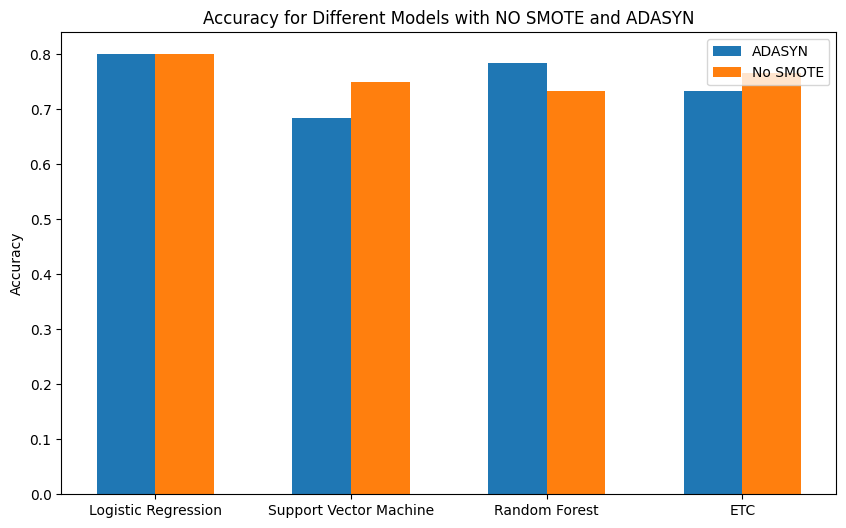

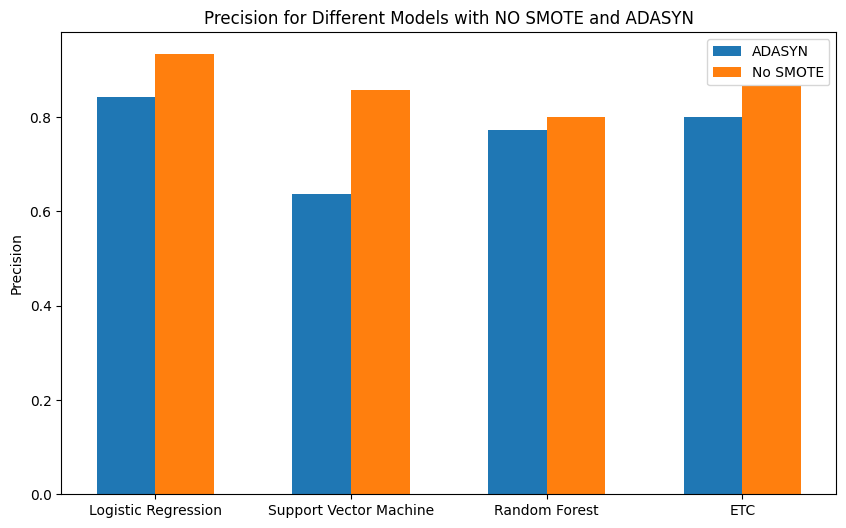

In [ ]:
metrics = ['OA','F1 Score', 'Recall', 'Accuracy', 'Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.9, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    #plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    plt.bar(np.arange(len(results)) + 0.3, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with NO SMOTE and ADASYN')
    plt.legend()
    plt.show()


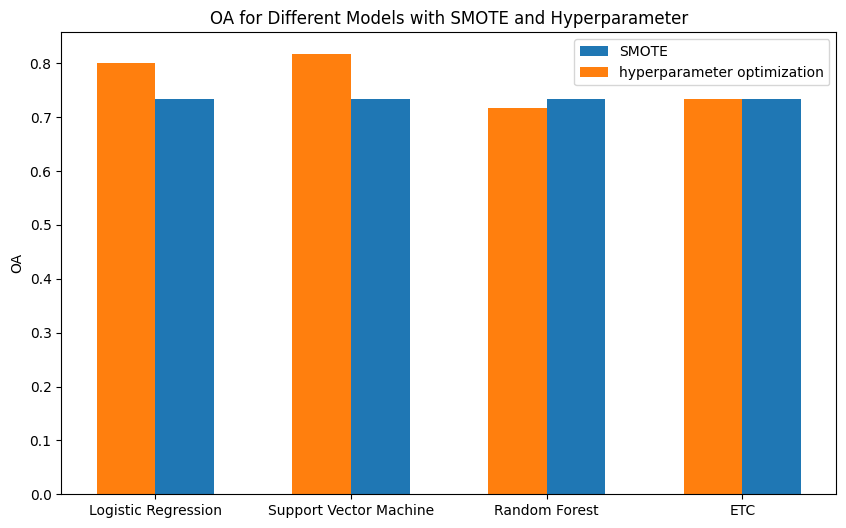

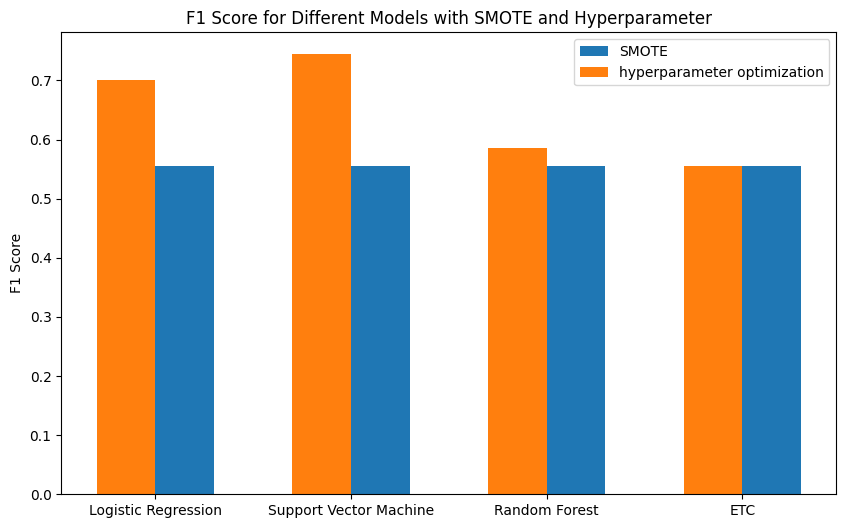

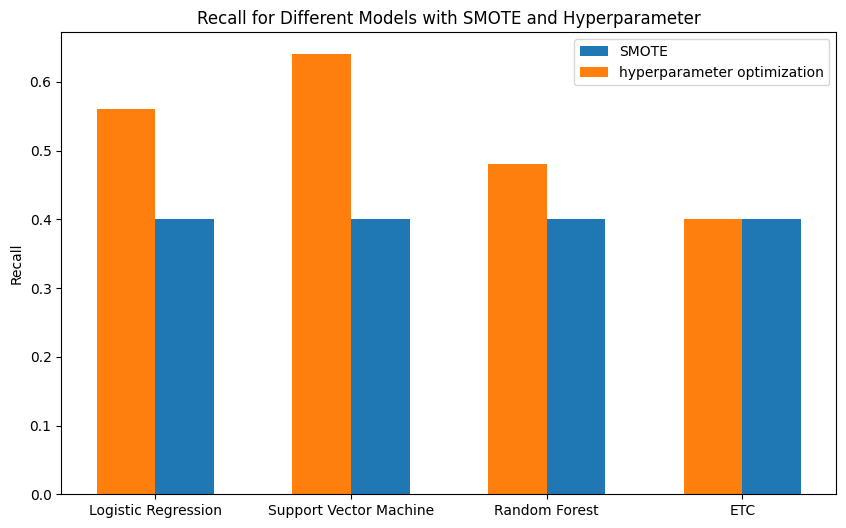

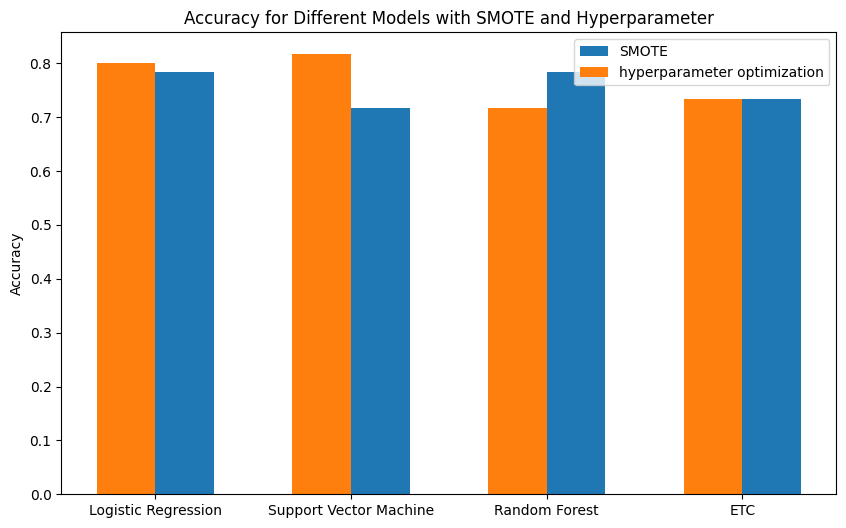

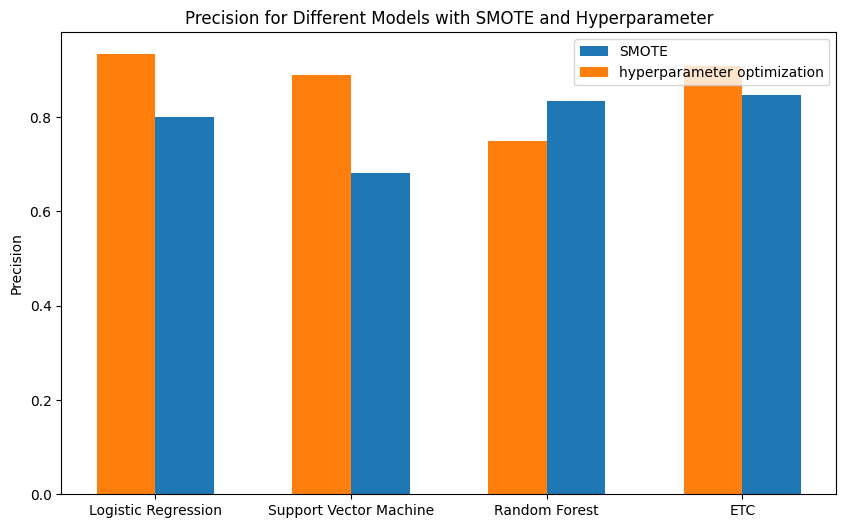

In [ ]:
metrics = ['OA','F1 Score', 'Recall', 'Accuracy', 'Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(results)) + 0.6, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 1.2, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    #plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and Hyperparameter')
    plt.legend()
    plt.show()


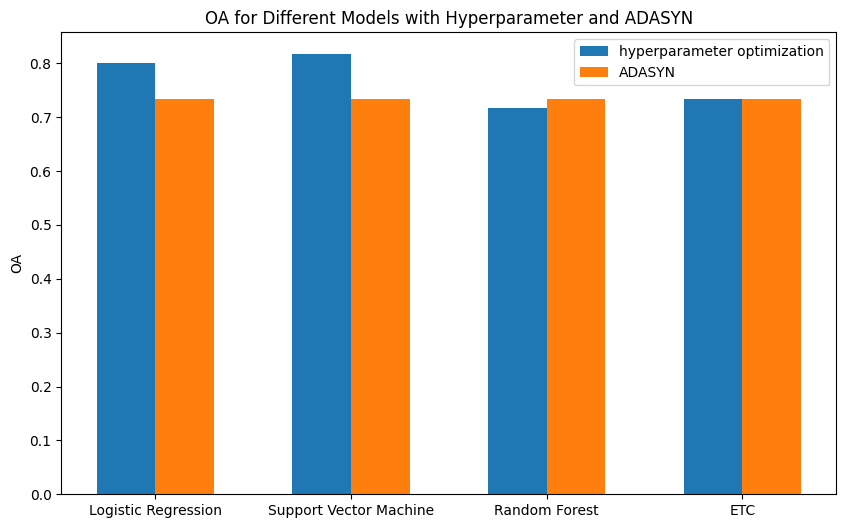

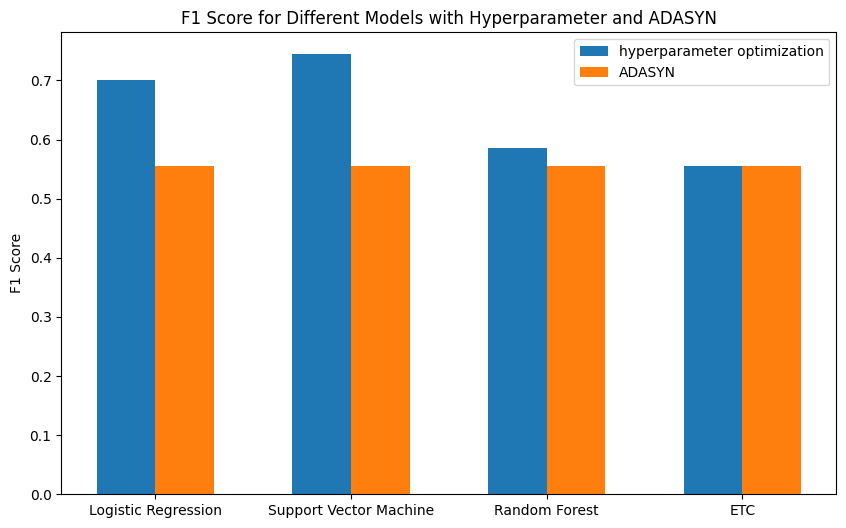

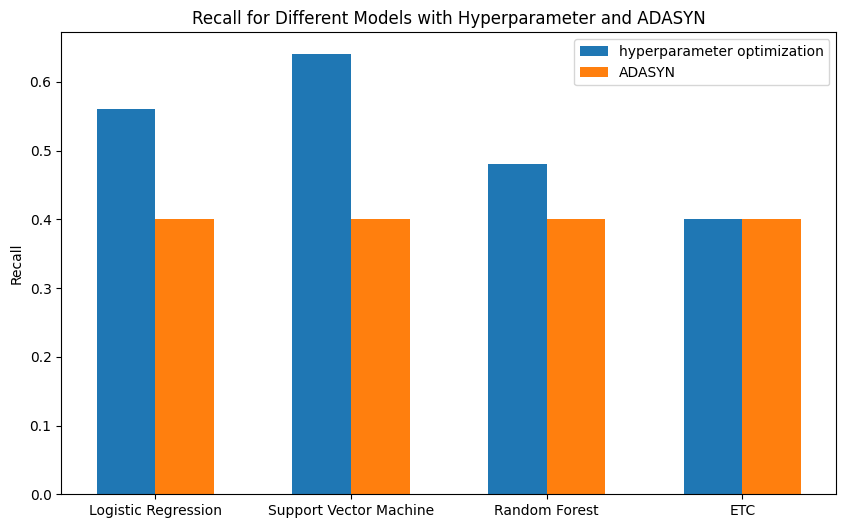

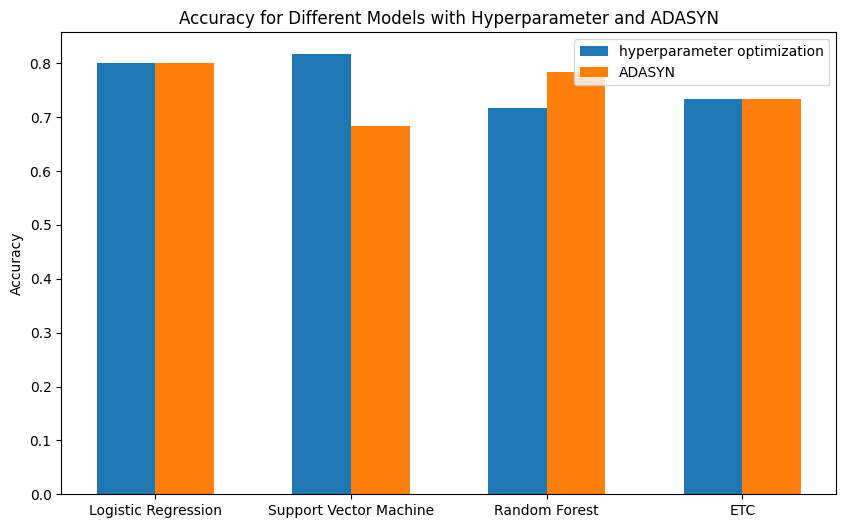

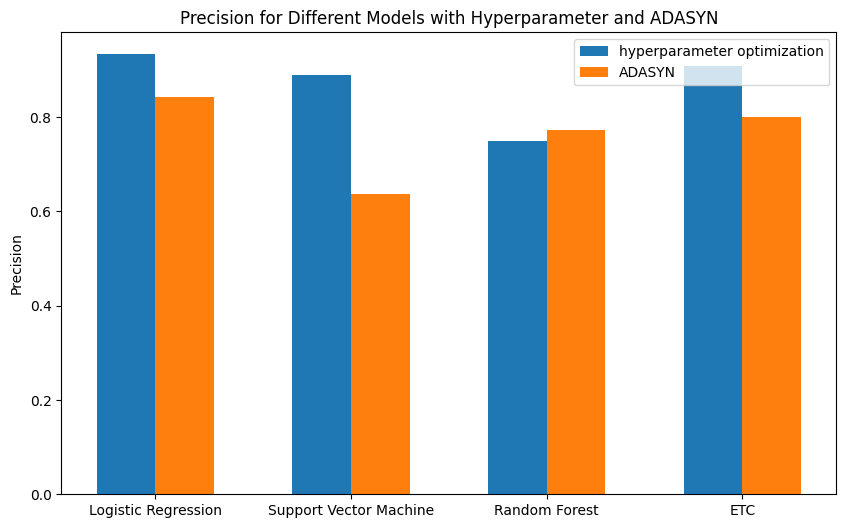

In [ ]:
metrics = ['OA','F1 Score', 'Recall', 'Accuracy', 'Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.91, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    plt.bar(np.arange(len(results)) + 0.6, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    #plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with Hyperparameter and ADASYN')
    plt.legend()
    plt.show()


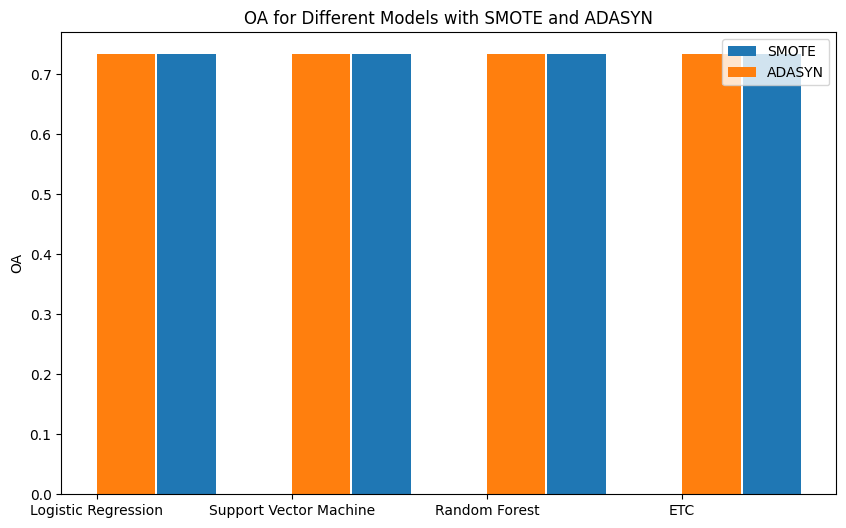

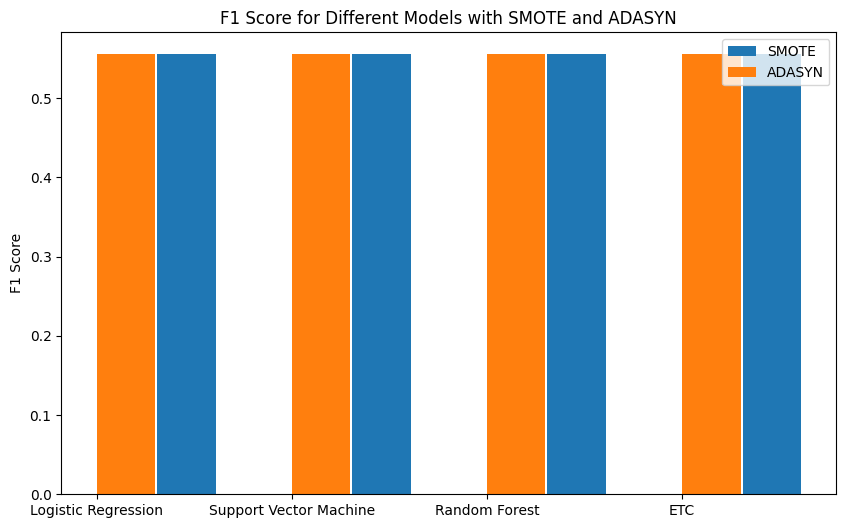

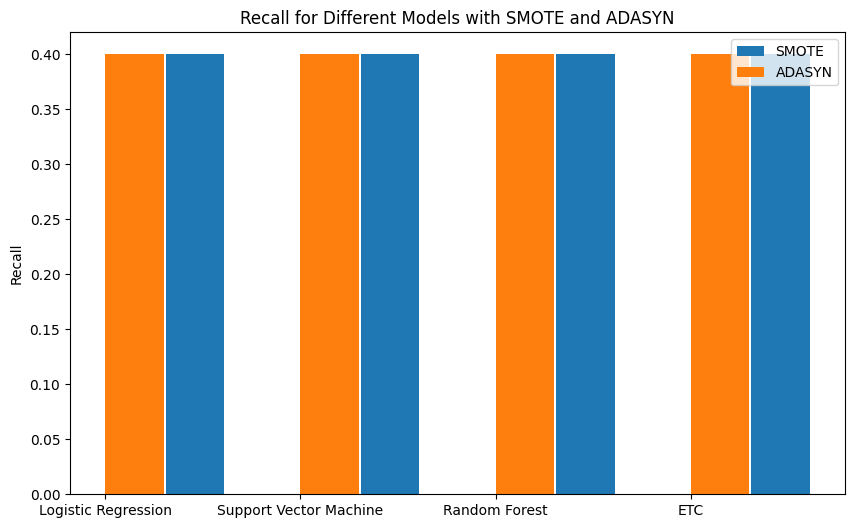

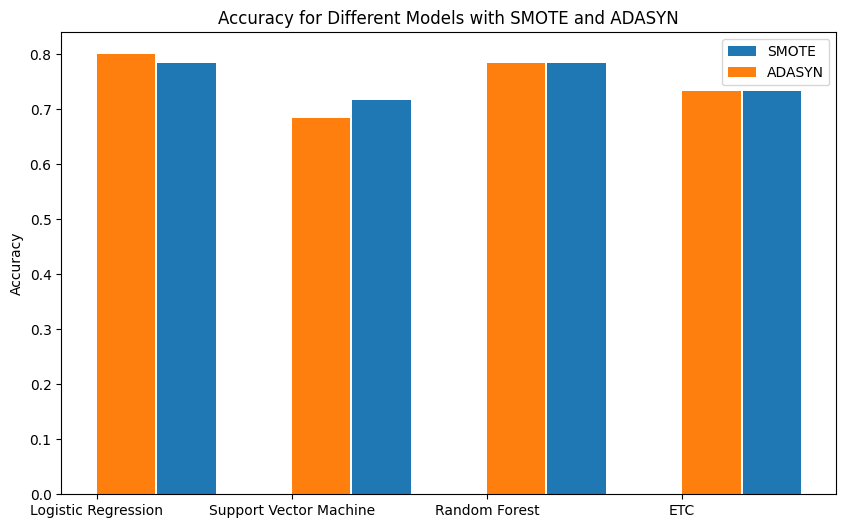

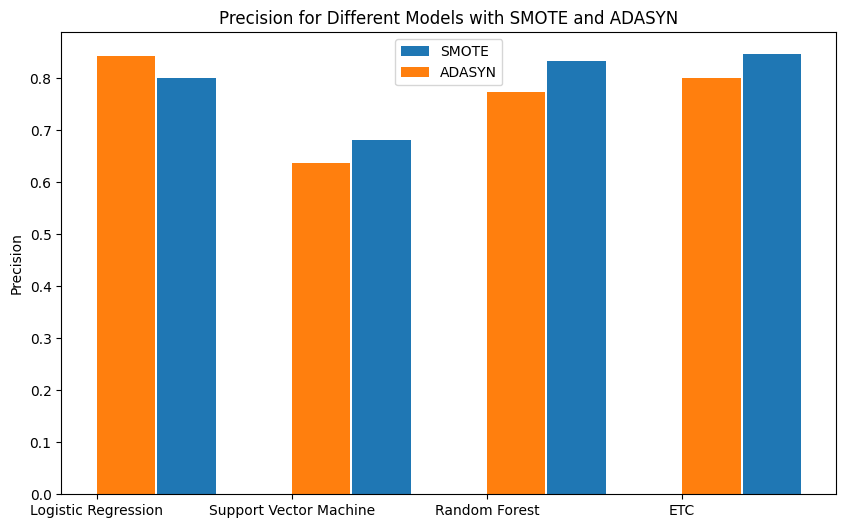

In [ ]:
metrics = ['OA','F1 Score', 'Recall', 'Accuracy', 'Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(results)) + 0.91, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    #plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    plt.bar(np.arange(len(results)) + 0.6, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    #plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()


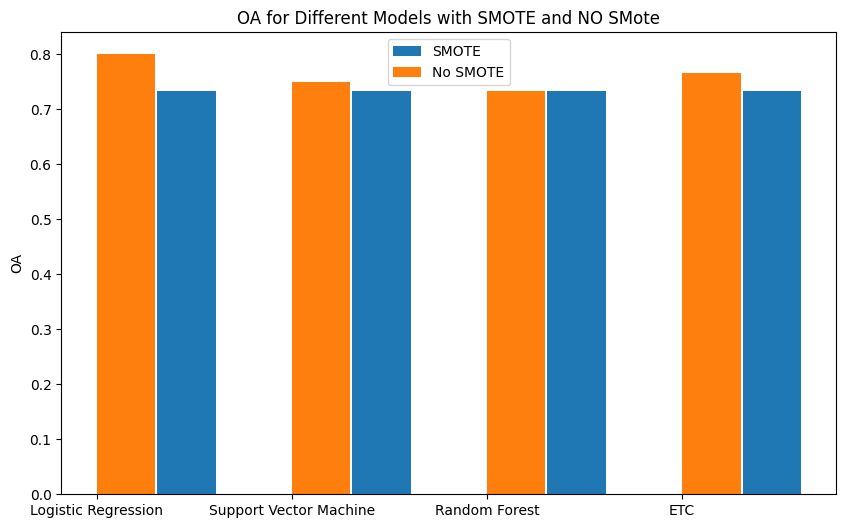

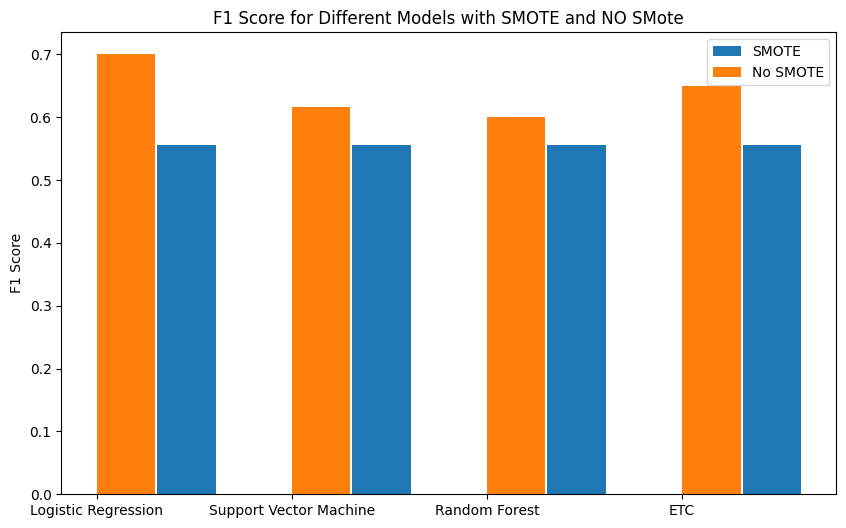

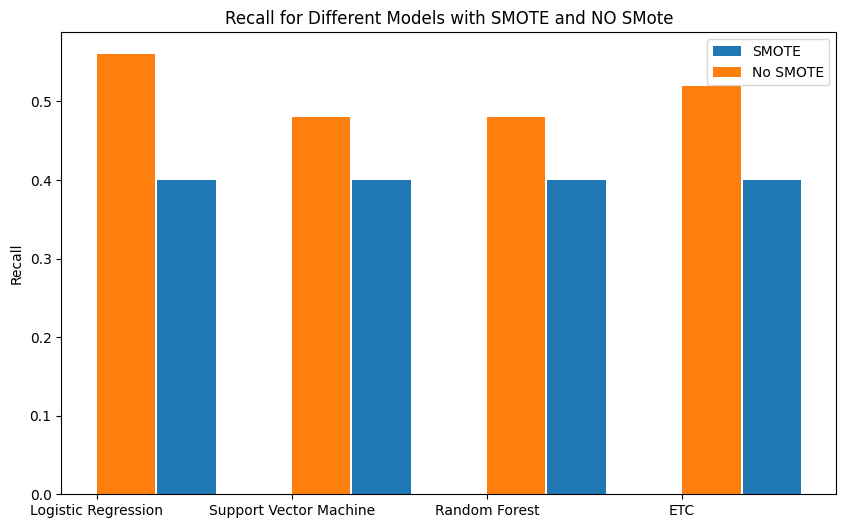

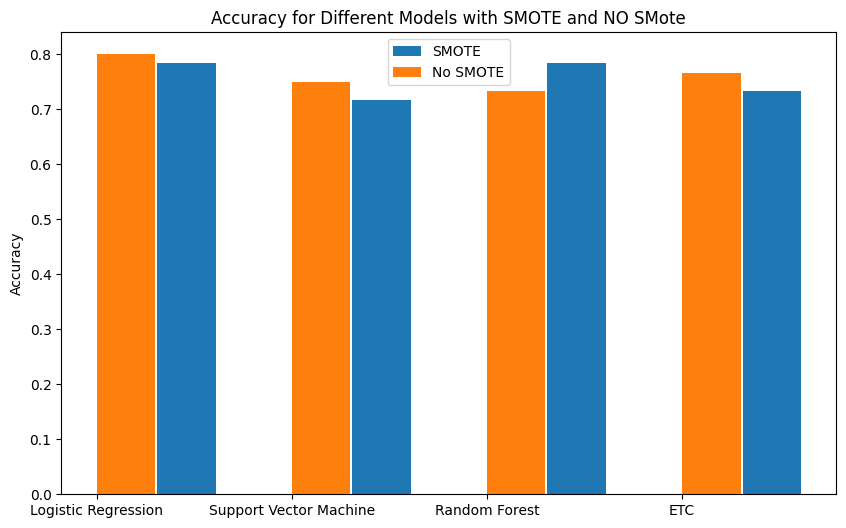

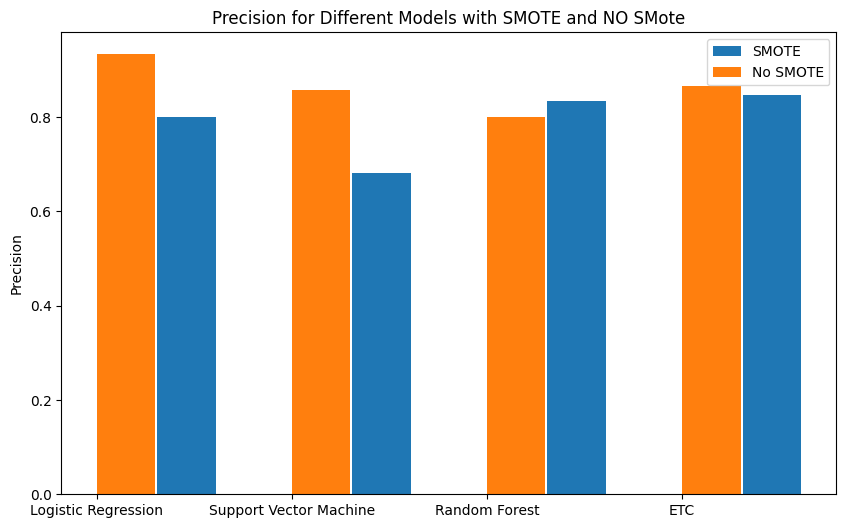

In [ ]:
metrics = ['OA','F1 Score', 'Recall', 'Accuracy', 'Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(results)) + 0.91, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    #plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 0.6, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and NO SMote')
    plt.legend()
    plt.show()


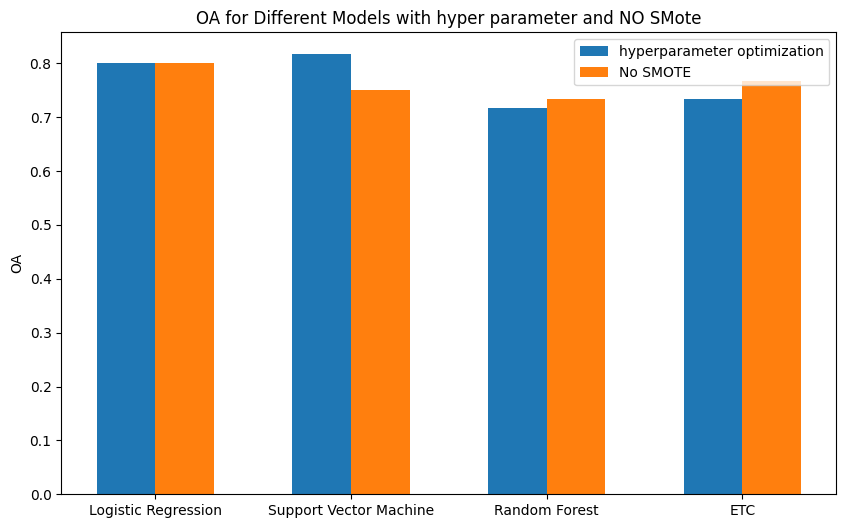

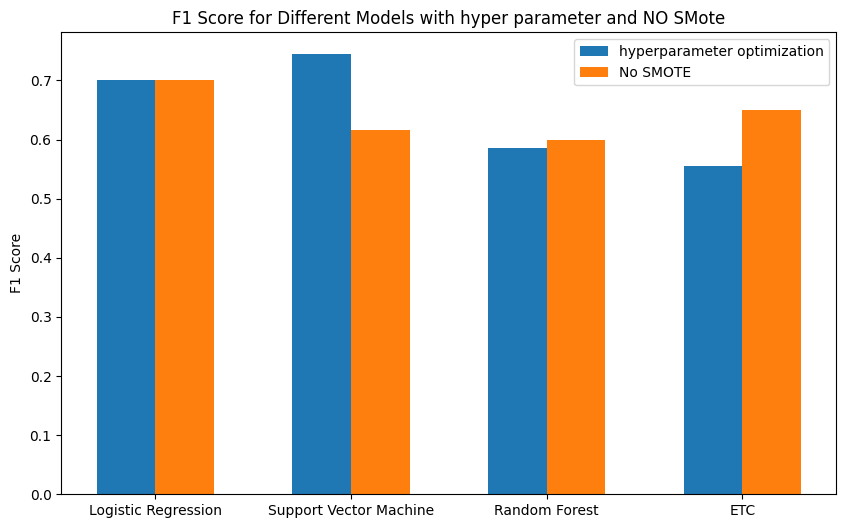

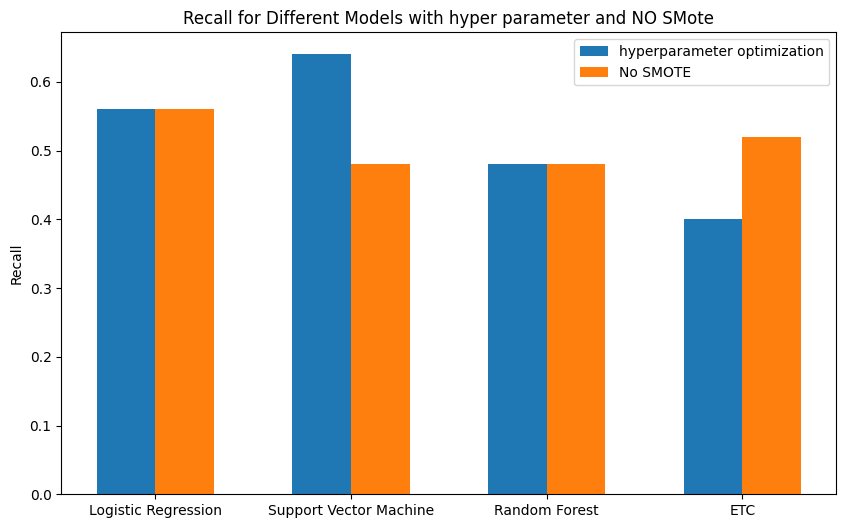

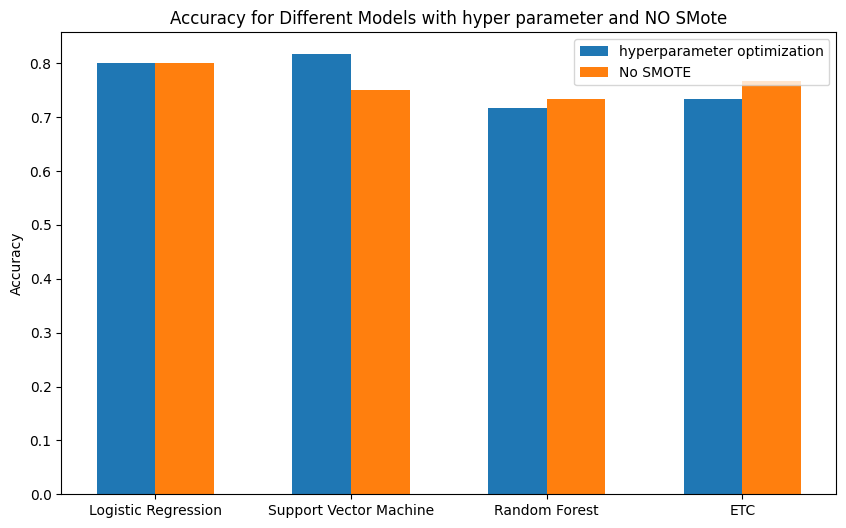

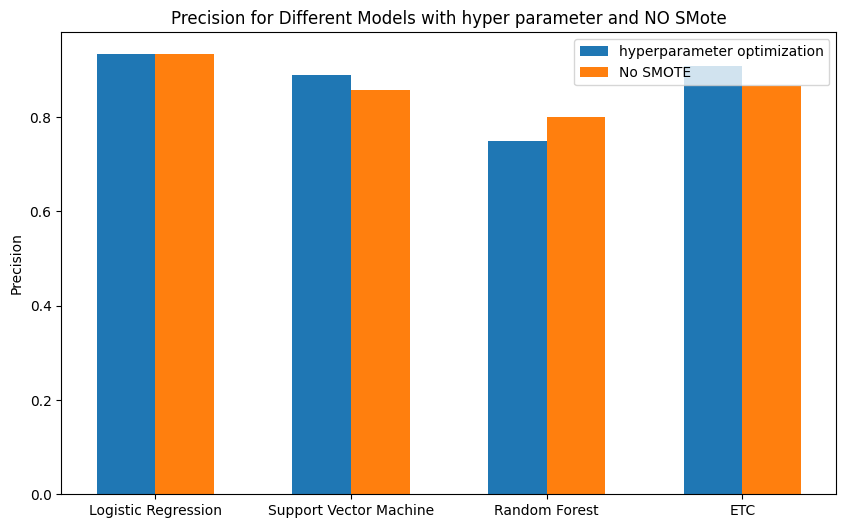

In [ ]:
metrics = ['OA','F1 Score', 'Recall', 'Accuracy', 'Precision']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.91, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 0.6, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
    plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with hyper parameter and NO SMote')
    plt.legend()
    plt.show()


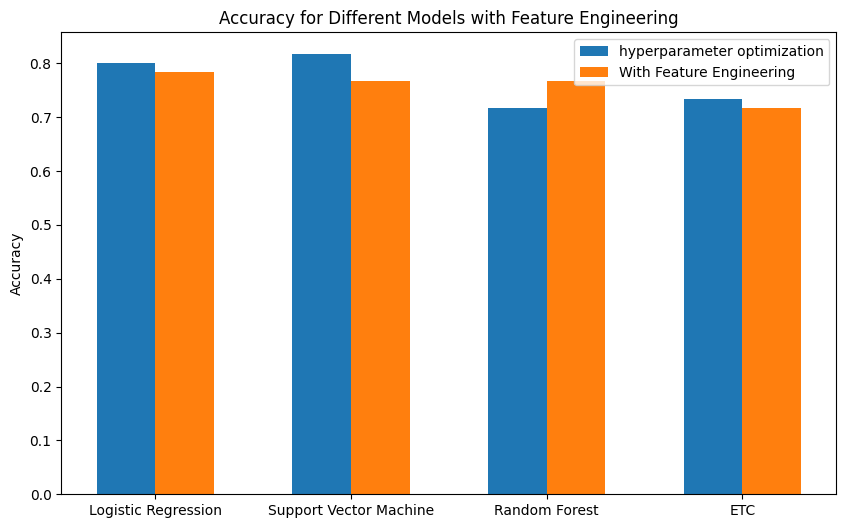

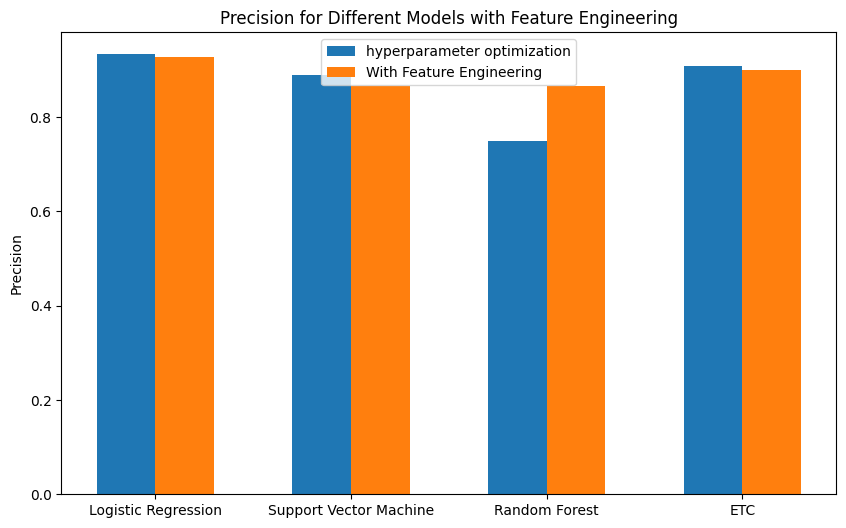

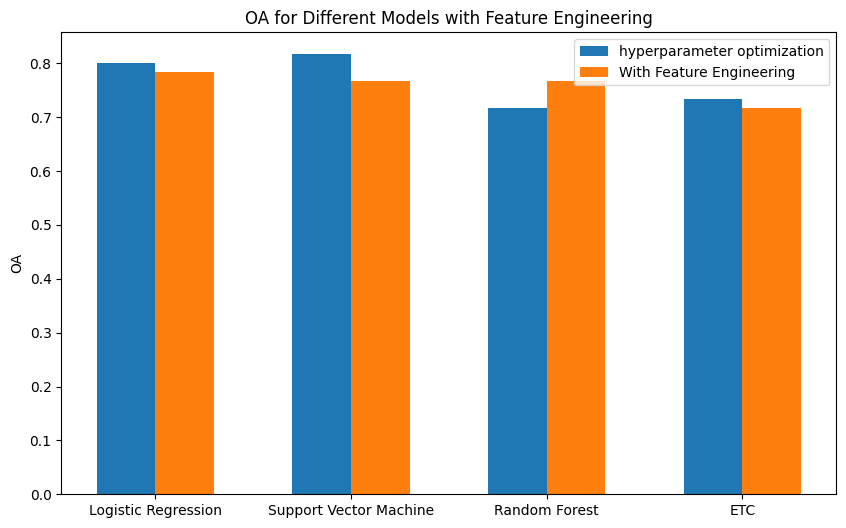

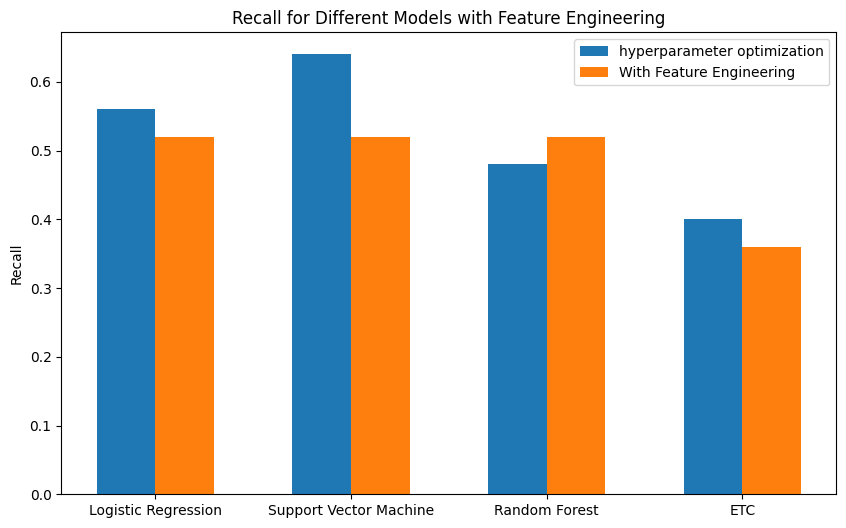

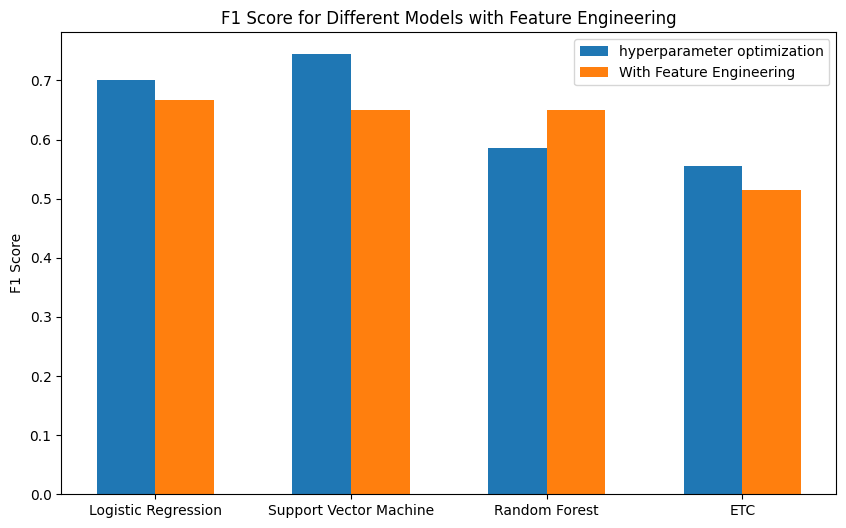

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Perform feature engineering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train the models with feature engineered data
results_feature_engineering = {}
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_pred_fe = clf.predict(X_test_pca)
    results_feature_engineering[name] = {
        'Accuracy': accuracy_score(y_test, y_pred_fe),
        'Precision': precision_score(y_test, y_pred_fe),
        'OA': accuracy_score(y_test, y_pred_fe),
        'Recall': recall_score(y_test, y_pred_fe),
        'F1 Score': f1_score(y_test, y_pred_fe)
    }

# Plot the results with feature engineering
metrics = ['Accuracy','Precision','OA','Recall', 'F1 Score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    plt.bar(np.arange(len(results)) + 0.6 , [results_feature_engineering[name][metric] for name in classifiers.keys()], width=0.3, label='With Feature Engineering')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with Feature Engineering')
    plt.legend()
    plt.show()


ModuleNotFoundError: No module named 'catboost'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import ADASYN
from catboost import CatBoostClassifier


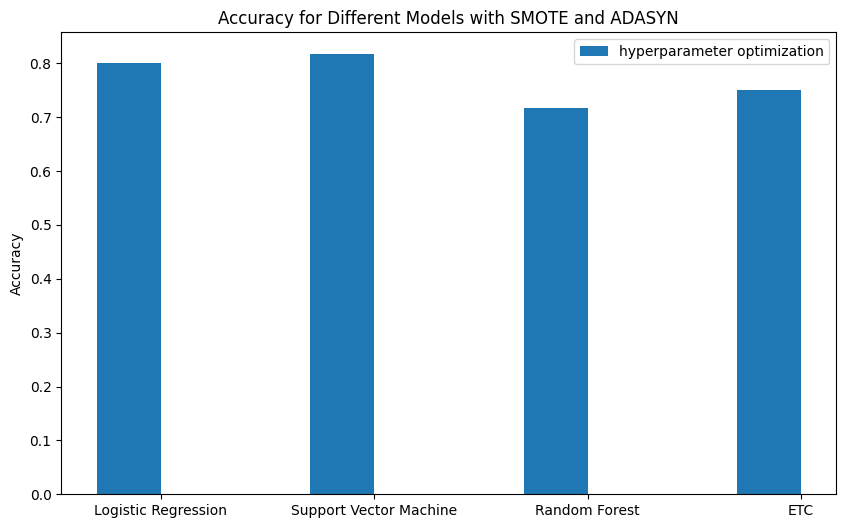

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Load the clinical data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#Prepare the data
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Apply SMOTE to the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Initialize dictionaries to store results
results_smote = {}
results_adasyn = {}

#Resample using ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

#Define the classifiers with default hyperparameters
classifiers = {
'Logistic Regression': LogisticRegression(),
'Support Vector Machine': SVC(),
'Random Forest': RandomForestClassifier(),
'ETC': ExtraTreesClassifier(),
'GBM': GradientBoostingClassifier()
}



hyperparameters = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
    'ETC': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},

}


from sklearn.ensemble import GradientBoostingClassifier
classifiers = {
'Logistic Regression': LogisticRegression(),
'Support Vector Machine': SVC(),
'Random Forest': RandomForestClassifier(),
'ETC': ExtraTreesClassifier(),

}

hyperparameters = {
'Logistic Regression': {'C': [0.1, 1, 10]},
'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
'ETC': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
}
# Perform grid search for hyperparameter optimization
results_gridsearch = {}
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid=hyperparameters[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    results_gridsearch[name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'OA': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)


  }


# Train the models using SMOTE
results_smote = {}
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred_smote = clf.predict(X_test)
    results_smote[name] = {
         'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred_smote),
        'Precision': precision_score(y_test, y_pred_smote),
        'OA': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)


         }
# Train the models using ADASYN
results_adasyn = {}
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred_adasyn = clf.predict(X_test)
    results_adasyn[name] = {
         'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred_adasyn),
        'Precision': precision_score(y_test, y_pred_adasyn),
        'OA': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)


          }

          # Train the models
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'OA': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)


    }



# Plot the results
metrics = ['Accuracy']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    #plt.bar(np.arange(len(results)) + 0.3, [results_smote[name][metric] for name in classifiers.keys()], width=0.3, label='SMOTE')
    plt.bar(np.arange(len(results)) + 0.3, [results_gridsearch[name][metric] for name in classifiers.keys()], width=0.3, label='hyperparameter optimization')
    #plt.bar(np.arange(len(results)) + 0.9, [results_adasyn[name][metric] for name in classifiers.keys()], width=0.3, label='ADASYN')
   # plt.bar(np.arange(len(results)) + 0.6 , [results[name][metric] for name in classifiers.keys()], width=0.3, label='No SMOTE')
    plt.xticks(np.arange(len(results)) + 0.45, classifiers.keys())
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models with SMOTE and ADASYN')
    plt.legend()
    plt.show()


